<img src="http://imgur.com/1ZcRyrc.png" style="float: left; margin: 20px; height: 55px">

# Ames Housing Price Prediction Project
## Regression Analysis
## Part 1a: Introduction

**Building a Home Valuation Model**

Automated valuation models are helpful tools for everyday people to use to closely estimate the value of their home or value of a desired home. Soon-to-be home buyers and sellers want to ensure they are in a fair value deal, and using online valuation tools, like the one here from [Remax](https://www.remax.com/home-value-estimates), helps with that process. The tool in this example for Remax likely aggregates the most recent housing data and uses the data to predict the price of the home today. However, these tools are inherently imperfect as different machine learning tools have different levels of accuracy.

**Project Outline**

In this project, the valuation model is based on the Ames housing dataset provided through this [Kaggle Challenge](https://www.kaggle.com/t/2dde5663e03b4165b853ff65e723c26d).

The scores of the following regression models will be compared to both find the optimal score and learn how different tools impact model performance.

- Linear Regression
- Ridge
- Lasso
- Random Forest Regressor
- AdaBoost w Decision Tree Regressor
- Support Vector Machine Regressor


## Part 1b: Data Cleaning

In [1]:
import numpy as np
import pandas as pd

#### Load and Inspect Training Data

In [2]:
# Import Training Data
ames = pd.read_csv('datasets/train.csv')

In [3]:
pd.set_option('max_columns', None)
ames.head()

,Id,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,Lot Config,Land Slope,Neighborhood,Condition 1,Condition 2,Bldg Type,House Style,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Roof Style,Roof Matl,Exterior 1st,Exterior 2nd,Mas Vnr Type,Mas Vnr Area,Exter Qual,Exter Cond,Foundation,Bsmt Qual,Bsmt Cond,Bsmt Exposure,BsmtFin Type 1,BsmtFin SF 1,BsmtFin Type 2,BsmtFin SF 2,Bsmt Unf SF,Total Bsmt SF,Heating,Heating QC,Central Air,Electrical,1st Flr SF,2nd Flr SF,Low Qual Fin SF,Gr Liv Area,Bsmt Full Bath,Bsmt Half Bath,Full Bath,Half Bath,Bedroom AbvGr,Kitchen AbvGr,Kitchen Qual,TotRms AbvGrd,Functional,Fireplaces,Fireplace Qu,Garage Type,Garage Yr Blt,Garage Finish,Garage Cars,Garage Area,Garage Qual,Garage Cond,Paved Drive,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,SalePrice
0,109,533352170,60,RL,NaN,13517,Pave,NaN,IR1,Lvl,AllPub,CulDSac,Gtl,Sawyer,RRAe,Norm,1Fam,2Story,6,8,1976,2005,Gable,CompShg,HdBoard,Plywood,BrkFace,289.0,Gd,TA,CBlock,TA,TA,No,GLQ,533.0,Unf,0.0,192.0,725.0,GasA,Ex,Y,SBrkr,725,754,0,1479,0.0,0.0,2,1,3,1,Gd,6,Typ,0,NaN,Attchd,1976.0,RFn,2.0,475.0,TA,TA,Y,0,44,0,0,0,0,NaN,NaN,NaN,0,3,2010,WD,130500
1,544,531379050,60,RL,43.0,11492,Pave,NaN,IR1,Lvl,AllPub,CulDSac,Gtl,SawyerW,Norm,Norm,1Fam,2Story,7,5,1996,1997,Gable,CompShg,VinylSd,VinylSd,BrkFace,132.0,Gd,TA,PConc,Gd,TA,No,GLQ,637.0,Unf,0.0,276.0,913.0,GasA,Ex,Y,SBrkr,913,1209,0,2122,1.0,0.0,2,1,4,1,Gd,8,Typ,1,TA,Attchd,1997.0,RFn,2.0,559.0,TA,TA,Y,0,74,0,0,0,0,NaN,NaN,NaN,0,4,2009,WD,220000
2,153,535304180,20,RL,68.0,7922,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,1Fam,1Story,5,7,1953,2007,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,Gd,CBlock,TA,TA,No,GLQ,731.0,Unf,0.0,326.0,1057.0,GasA,TA,Y,SBrkr,1057,0,0,1057,1.0,0.0,1,0,3,1,Gd,5,Typ,0,NaN,Detchd,1953.0,Unf,1.0,246.0,TA,TA,Y,0,52,0,0,0,0,NaN,NaN,NaN,0,1,2010,WD,109000
3,318,916386060,60,RL,73.0,9802,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Timber,Norm,Norm,1Fam,2Story,5,5,2006,2007,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,PConc,Gd,TA,No,Unf,0.0,Unf,0.0,384.0,384.0,GasA,Gd,Y,SBrkr,744,700,0,1444,0.0,0.0,2,1,3,1,TA,7,Typ,0,NaN,BuiltIn,2007.0,Fin,2.0,400.0,TA,TA,Y,100,0,0,0,0,0,NaN,NaN,NaN,0,4,2010,WD,174000
4,255,906425045,50,RL,82.0,14235,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,SawyerW,Norm,Norm,1Fam,1.5Fin,6,8,1900,1993,Gable,CompShg,Wd Sdng,Plywood,None,0.0,TA,TA,PConc,Fa,Gd,No,Unf,0.0,Unf,0.0,676.0,676.0,GasA,TA,Y,SBrkr,831,614,0,1445,0.0,0.0,2,0,3,1,TA,6,Typ,0,NaN,Detchd,1957.0,Unf,2.0,484.0,TA,TA,N,0,59,0,0,0,0,NaN,NaN,NaN,0,3,2010,WD,138500


In [4]:
pd.set_option('max_rows', None)
ames.isnull().sum()

Id                    0
PID                   0
MS SubClass           0
MS Zoning             0
Lot Frontage        330
Lot Area              0
Street                0
Alley              1911
Lot Shape             0
Land Contour          0
Utilities             0
Lot Config            0
Land Slope            0
Neighborhood          0
Condition 1           0
Condition 2           0
Bldg Type             0
House Style           0
Overall Qual          0
Overall Cond          0
Year Built            0
Year Remod/Add        0
Roof Style            0
Roof Matl             0
Exterior 1st          0
Exterior 2nd          0
Mas Vnr Type         22
Mas Vnr Area         22
Exter Qual            0
Exter Cond            0
Foundation            0
Bsmt Qual            55
Bsmt Cond            55
Bsmt Exposure        58
BsmtFin Type 1       55
BsmtFin SF 1          1
BsmtFin Type 2       56
BsmtFin SF 2          1
Bsmt Unf SF           1
Total Bsmt SF         1
Heating               0
Heating QC      

## Reviewing Null Values

In [5]:
ames.head()

,Id,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,Lot Config,Land Slope,Neighborhood,Condition 1,Condition 2,Bldg Type,House Style,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Roof Style,Roof Matl,Exterior 1st,Exterior 2nd,Mas Vnr Type,Mas Vnr Area,Exter Qual,Exter Cond,Foundation,Bsmt Qual,Bsmt Cond,Bsmt Exposure,BsmtFin Type 1,BsmtFin SF 1,BsmtFin Type 2,BsmtFin SF 2,Bsmt Unf SF,Total Bsmt SF,Heating,Heating QC,Central Air,Electrical,1st Flr SF,2nd Flr SF,Low Qual Fin SF,Gr Liv Area,Bsmt Full Bath,Bsmt Half Bath,Full Bath,Half Bath,Bedroom AbvGr,Kitchen AbvGr,Kitchen Qual,TotRms AbvGrd,Functional,Fireplaces,Fireplace Qu,Garage Type,Garage Yr Blt,Garage Finish,Garage Cars,Garage Area,Garage Qual,Garage Cond,Paved Drive,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,SalePrice
0,109,533352170,60,RL,NaN,13517,Pave,NaN,IR1,Lvl,AllPub,CulDSac,Gtl,Sawyer,RRAe,Norm,1Fam,2Story,6,8,1976,2005,Gable,CompShg,HdBoard,Plywood,BrkFace,289.0,Gd,TA,CBlock,TA,TA,No,GLQ,533.0,Unf,0.0,192.0,725.0,GasA,Ex,Y,SBrkr,725,754,0,1479,0.0,0.0,2,1,3,1,Gd,6,Typ,0,NaN,Attchd,1976.0,RFn,2.0,475.0,TA,TA,Y,0,44,0,0,0,0,NaN,NaN,NaN,0,3,2010,WD,130500
1,544,531379050,60,RL,43.0,11492,Pave,NaN,IR1,Lvl,AllPub,CulDSac,Gtl,SawyerW,Norm,Norm,1Fam,2Story,7,5,1996,1997,Gable,CompShg,VinylSd,VinylSd,BrkFace,132.0,Gd,TA,PConc,Gd,TA,No,GLQ,637.0,Unf,0.0,276.0,913.0,GasA,Ex,Y,SBrkr,913,1209,0,2122,1.0,0.0,2,1,4,1,Gd,8,Typ,1,TA,Attchd,1997.0,RFn,2.0,559.0,TA,TA,Y,0,74,0,0,0,0,NaN,NaN,NaN,0,4,2009,WD,220000
2,153,535304180,20,RL,68.0,7922,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,1Fam,1Story,5,7,1953,2007,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,Gd,CBlock,TA,TA,No,GLQ,731.0,Unf,0.0,326.0,1057.0,GasA,TA,Y,SBrkr,1057,0,0,1057,1.0,0.0,1,0,3,1,Gd,5,Typ,0,NaN,Detchd,1953.0,Unf,1.0,246.0,TA,TA,Y,0,52,0,0,0,0,NaN,NaN,NaN,0,1,2010,WD,109000
3,318,916386060,60,RL,73.0,9802,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Timber,Norm,Norm,1Fam,2Story,5,5,2006,2007,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,PConc,Gd,TA,No,Unf,0.0,Unf,0.0,384.0,384.0,GasA,Gd,Y,SBrkr,744,700,0,1444,0.0,0.0,2,1,3,1,TA,7,Typ,0,NaN,BuiltIn,2007.0,Fin,2.0,400.0,TA,TA,Y,100,0,0,0,0,0,NaN,NaN,NaN,0,4,2010,WD,174000
4,255,906425045,50,RL,82.0,14235,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,SawyerW,Norm,Norm,1Fam,1.5Fin,6,8,1900,1993,Gable,CompShg,Wd Sdng,Plywood,None,0.0,TA,TA,PConc,Fa,Gd,No,Unf,0.0,Unf,0.0,676.0,676.0,GasA,TA,Y,SBrkr,831,614,0,1445,0.0,0.0,2,0,3,1,TA,6,Typ,0,NaN,Detchd,1957.0,Unf,2.0,484.0,TA,TA,N,0,59,0,0,0,0,NaN,NaN,NaN,0,3,2010,WD,138500


**Remove ID and PID**
- These columns are equivalent to indices and not needed

In [6]:
# Drop ids
ames.drop(columns=['Id', 'PID'], inplace=True)

**MSSubClass** The building class
- 20 1-STORY 1946 & NEWER ALL STYLES
- 30 1-STORY 1945 & OLDER
- 40 1-STORY W/FINISHED ATTIC ALL AGES
- 45 1-1/2 STORY - UNFINISHED ALL AGES
- 50 1-1/2 STORY FINISHED ALL AGES
- 60 2-STORY 1946 & NEWER
- 70 2-STORY 1945 & OLDER
- 75 2-1/2 STORY ALL AGES
- 80 SPLIT OR MULTI-LEVEL
- 85 SPLIT FOYER
- 90 DUPLEX - ALL STYLES AND AGES
- 120 1-STORY PUD (Planned Unit Development) - 1946 & NEWER
- 150 1-1/2 STORY PUD - ALL AGES
- 160 2-STORY PUD - 1946 & NEWER
- 180 PUD - MULTILEVEL - INCL SPLIT LEV/FOYER
- 190 2 FAMILY CONVERSION - ALL STYLES AND AGES

In [7]:
ames['MS SubClass'].value_counts() 

20     770
60     394
50     198
120    132
30     101
70      90
160     88
80      86
90      75
190     46
85      28
75      16
45      11
180     11
40       4
150      1
Name: MS SubClass, dtype: int64

Change subclass value to string to dummify later.

**MS Zoning** Identifies the general zoning classification of the sale.
- A Agriculture
- C Commercial
- FV Floating Village Residential
- I Industrial
- RH Residential High Density
- RL Residential Low Density
- RP Residential Low Density Park
- RM Residential Medium Density

In [8]:
ames['MS Zoning'].value_counts() 

RL         1598
RM          316
FV          101
C (all)      19
RH           14
A (agr)       2
I (all)       1
Name: MS Zoning, dtype: int64

**Lot Frontage**
Linear feet of street connected to property

In [9]:
# Null values
print(ames['Lot Frontage'].isnull().sum())

330


In [10]:
ames['Lot Frontage'].fillna(value=0, inplace =True)

**Lot Area** Lot size in square feet

In [11]:
#Null values
print(ames['Lot Area'].isnull().sum())

0


**Street** Type of Road Access

In [12]:
ames['Street'].value_counts()

Pave    2044
Grvl       7
Name: Street, dtype: int64

Only 7 Grvl cases, might be worth dropping column.

**Alley** Type of alley access

In [13]:
print(ames['Alley'].isnull().sum()) 
ames['Alley'].value_counts()

1911


Grvl    85
Pave    55
Name: Alley, dtype: int64

In [14]:
ames['Alley'].fillna(value='None', inplace=True)

In [15]:
print(ames['Alley'].isnull().sum())
ames['Alley'].value_counts()

0


None    1911
Grvl      85
Pave      55
Name: Alley, dtype: int64

Alley null values changed to 'None' for No Alley category

**Lot Shape** General shape of property

In [16]:
# Check categories
ames['Lot Shape'].value_counts()

Reg    1295
IR1     692
IR2      55
IR3       9
Name: Lot Shape, dtype: int64

In [17]:
# Change from IR1,2,3 to IR only
ames['Lot Shape'] = ames['Lot Shape'].replace(['IR1',
                                               'IR2',
                                               'IR3'],'IR')

**Land Contour** Flatness of the property

In [18]:
# Check categories
ames['Land Contour'].value_counts()

Lvl    1843
HLS      85
Bnk      80
Low      43
Name: Land Contour, dtype: int64

**Utilities** Type of utilities available
- AllPub All public Utilities (E,G,W,& S)
- NoSewr Electricity, Gas, and Water (Septic Tank)
- NoSeWa Electricity and Gas Only
- ELO Electricity only

In [19]:
# Check categories
ames['Utilities'].value_counts() 

AllPub    2049
NoSeWa       1
NoSewr       1
Name: Utilities, dtype: int64

In [20]:
# remove Utilities due to single instances
ames.drop(columns='Utilities', inplace=True)

**Lot Config** Lot configuration
- Inside Inside lot
- Corner Corner lot
- CulDSac Cul-de-sac
- FR2 Frontage on 2 sides of property
- FR3 Frontage on 3 sides of property

In [21]:
# Check Categories
ames['Lot Config'].value_counts()

Inside     1503
Corner      348
CulDSac     131
FR2          60
FR3           9
Name: Lot Config, dtype: int64

In [22]:
# Combine FR2 and FR3
ames['Lot Config'] = ames['Lot Config'].replace(['FR2',
                                               'FR3'],'FR')

In [23]:
# Check Categories
ames['Lot Config'].value_counts()

Inside     1503
Corner      348
CulDSac     131
FR           69
Name: Lot Config, dtype: int64

**Land Slope** Slope of property
- Gtl Gentle slope
- Mod Moderate Slope
- Sev Severe Slope

In [24]:
# Check categories
ames['Land Slope'].value_counts() 

Gtl    1953
Mod      88
Sev      10
Name: Land Slope, dtype: int64

**Neighborhood** Physical locations within Ames city limits
- Blmngtn Bloomington Heights
- Blueste Bluestem
- BrDale Briardale
- BrkSide Brookside
- ClearCr Clear Creek
- CollgCr College Creek
- Crawfor Crawford
- Edwards Edwards
- Gilbert Gilbert
- IDOTRR Iowa DOT and Rail Road
- MeadowV Meadow Village
- Mitchel Mitchell
- Names North Ames
- NoRidge Northridge
- NPkVill Northpark Villa
- NridgHt Northridge Heights
- NWAmes Northwest Ames
- OldTown Old Town
- SWISU South & West of Iowa State University
- Sawyer Sawyer
- SawyerW Sawyer West
- Somerst Somerset
- StoneBr Stone Brook
- Timber Timberland
- Veenker Veenker

In [25]:
# Check categories
ames['Neighborhood'].value_counts()

NAmes      310
CollgCr    180
OldTown    163
Edwards    143
Somerst    130
NridgHt    122
Gilbert    116
Sawyer     111
SawyerW     87
NWAmes      87
Mitchel     82
BrkSide     76
Crawfor     71
IDOTRR      69
Timber      48
NoRidge     48
StoneBr     38
SWISU       32
ClearCr     27
MeadowV     24
Blmngtn     22
BrDale      19
NPkVill     17
Veenker     17
Blueste      6
Greens       3
GrnHill      2
Landmrk      1
Name: Neighborhood, dtype: int64

**Condition 1** Proximity to main road or railroad
- Artery Adjacent to arterial street
- Feedr Adjacent to feeder street
- Norm Normal
- RRNn Within 200' of North-South Railroad
- RRAn Adjacent to North-South Railroad
- PosN Near positive off-site feature--park, greenbelt, etc.
- PosA Adjacent to postive off-site feature
- RRNe Within 200' of East-West Railroad
- RRAe Adjacent to East-West Railroad

In [26]:
# Check categories
ames['Condition 1'].value_counts()

Norm      1767
Feedr      109
Artery      70
RRAn        36
PosN        27
RRAe        21
PosA        12
RRNn         6
RRNe         3
Name: Condition 1, dtype: int64

In [27]:
# Combine railroad categories to 'RR'
ames['Condition 1'] = ames['Condition 1'].replace(['RRNn','RRAn','RRNe','RRAe'],'RR')

In [28]:
# Check categories
ames['Condition 1'].value_counts()

Norm      1767
Feedr      109
Artery      70
RR          66
PosN        27
PosA        12
Name: Condition 1, dtype: int64

**Condition2** Proximity to main road or railroad (if a second is present)
- Artery Adjacent to arterial street
- Feedr Adjacent to feeder street
- Norm Normal
- RRNn Within 200' of North-South Railroad
- RRAn Adjacent to North-South Railroad
- PosN Near positive off-site feature--park, greenbelt, etc.
- PosA Adjacent to postive off-site feature
- RRNe Within 200' of East-West Railroad
- RRAe Adjacent to East-West Railroad

In [29]:
# Check categories
ames['Condition 2'].value_counts()

Norm      2025
Feedr       11
Artery       5
PosN         3
PosA         3
RRNn         2
RRAe         1
RRAn         1
Name: Condition 2, dtype: int64

In [30]:
# Combine railroad categories to 'RR'
ames['Condition 2'] = ames['Condition 2'].replace(['RRNn','RRAn','RRNe','RRAe'],'RR')

**BldgType** Type of dwelling
- 1Fam Single-family Detached
- 2FmCon Two-family Conversion; originally built as one-family dwelling
- Duplx Duplex
- TwnhsE Townhouse End Unit
- TwnhsI Townhouse Inside Unit

In [31]:
# Check categories
ames['Bldg Type'].value_counts()

1Fam      1700
TwnhsE     161
Duplex      75
Twnhs       69
2fmCon      46
Name: Bldg Type, dtype: int64

**HouseStyle** Style of dwelling
- 1Story One story
- 1.5Fin One and one-half story: 2nd level finished
- 1.5Unf One and one-half story: 2nd level unfinished
- 2Story Two story
- 2.5Fin Two and one-half story: 2nd level finished
- 2.5Unf Two and one-half story: 2nd level unfinished
- SFoyer Split Foyer
- SLvl Split Level

In [32]:
# Check categories
ames['House Style'].value_counts()

1Story    1059
2Story     598
1.5Fin     218
SLvl        94
SFoyer      50
2.5Unf      14
1.5Unf      12
2.5Fin       6
Name: House Style, dtype: int64

**OverallQual** Overall material and finish quality
- 10 Very Excellent
- 9 Excellent
- 8 Very Good
- 7 Good
- 6 Above Average
- 5 Average
- 4 Below Average
- 3 Fair
- 2 Poor
- 1 Very Poor

In [33]:
# Check numeric categories
ames['Overall Qual'].value_counts()

5     563
6     506
7     431
8     250
4     159
9      77
3      29
10     23
2       9
1       4
Name: Overall Qual, dtype: int64

**Overall Cond** Overall condition rating
- 10 Very Excellent
- 9 Excellent
- 8 Very Good
- 7 Good
- 6 Above Average
- 5 Average
- 4 Below Average
- 3 Fair
- 2 Poor
- 1 Very Poor

In [34]:
# Check numeric categories
ames['Overall Cond'].value_counts()

5    1168
6     368
7     270
8     101
4      70
3      35
9      29
2       6
1       4
Name: Overall Cond, dtype: int64

**YearBuilt** Original construction date

In [35]:
ames['Year Built'].unique() # YearBuilt: Original construction date

array([1976, 1996, 1953, 2006, 1900, 1966, 2005, 1959, 1952, 1969, 1971,
       1880, 1999, 2007, 2004, 1916, 1963, 1977, 2009, 1968, 2000, 1992,
       1955, 1961, 1965, 1937, 1895, 1949, 1981, 1929, 1995, 1958, 1973,
       1994, 1978, 1954, 1935, 1941, 1931, 2003, 1928, 1970, 1951, 1920,
       1930, 1924, 1927, 1960, 1925, 1910, 2008, 1915, 1997, 1956, 1979,
       1964, 2001, 1972, 1957, 1939, 1962, 1947, 1940, 1932, 1967, 1993,
       1875, 1912, 2010, 1987, 1918, 1988, 1922, 1926, 1984, 1942, 1890,
       2002, 1975, 1998, 1936, 1938, 1985, 1923, 1948, 1950, 1980, 1991,
       1917, 1986, 1946, 1885, 1914, 1896, 1983, 1921, 1945, 1901, 1990,
       1974, 1913, 1905, 1982, 1919, 1872, 1892, 1934, 1879, 1893, 1898,
       1911, 1908, 1989])

In [36]:
print(ames['Year Built'].min())
print(ames['Year Built'].max())

1872
2010


**YearRemodAdd** Remodel date (same as construction date if no remodeling or additions)

In [37]:
ames['Year Remod/Add'].unique()

array([2005, 1997, 2007, 1993, 2002, 2006, 1959, 1952, 1969, 1971, 2000,
       1950, 1963, 1977, 2009, 1968, 1955, 1961, 1995, 1981, 1996, 2008,
       1958, 1973, 1994, 1965, 1978, 1954, 1960, 2004, 1970, 1951, 1975,
       1953, 2001, 2010, 2003, 1979, 1964, 1956, 1972, 1957, 1992, 1962,
       1998, 1990, 1967, 1985, 1987, 1988, 1976, 1984, 1999, 1966, 1980,
       1989, 1991, 1986, 1982, 1983, 1974])

- Convert ames['Year Remod/Add'] to Built/Remodelled in the past 10 years, Blt/Remodeled between 10-20 years ago, blt/remodeled over 20 years ago
- Review list for correct categorization

In [38]:
# baseline year of 2010

ames['Year Remod/Add Cats'] = 0

for i in range(0, len(ames['Year Remod/Add'])):
    
    # Blt/Remod<10 yrs - if built in the past 10 year OR remodeled in the past 10 years
    if ((ames['Year Remod/Add'][i] == ames['Year Built'][i]) & (2010 - ames['Year Built'][i] <= 10)) or (2010 - ames['Year Remod/Add'][i] <= 10):
        ames['Year Remod/Add Cats'][i] = 'Blt/Remod<10 yrs'
        print(ames['Year Remod/Add'][i], ames['Year Built'][i], ames['Year Remod/Add'][i] - ames['Year Built'][i], ames['Year Remod/Add Cats'][i])
    
    # Blt/Remod 10-20 yrs - if built in the past 11-20 year2 OR remodeled in the past 11-20 years
    elif ((ames['Year Remod/Add'][i] == ames['Year Built'][i]) and ((2010 - ames['Year Built'][i] >= 10) and (2010 - ames['Year Built'][i] <= 20))) or ((2010 - ames['Year Remod/Add'][i] >= 10) and (2010 - ames['Year Remod/Add'][i] <= 20)):
        ames['Year Remod/Add Cats'][i] = 'Blt/Remod 10-20 yrs'
    
    #Blt/Remod>20 yrs - Rebuilt or remodeled over 20 years ago
    else:
        ames['Year Remod/Add Cats'][i] = 'Blt/Remod>20 yrs'
        print('*', ames['Year Remod/Add'][i], ames['Year Built'][i], ames['Year Remod/Add'][i] - ames['Year Built'][i], ames['Year Remod/Add Cats'][i])

2005 1976 29 Blt/Remod<10 yrs
2007 1953 54 Blt/Remod<10 yrs
2007 2006 1 Blt/Remod<10 yrs
2002 1966 36 Blt/Remod<10 yrs
2006 2005 1 Blt/Remod<10 yrs
* 1959 1959 0 Blt/Remod>20 yrs
* 1952 1952 0 Blt/Remod>20 yrs
* 1969 1969 0 Blt/Remod>20 yrs
* 1971 1971 0 Blt/Remod>20 yrs
2005 2005 0 Blt/Remod<10 yrs
2007 1880 127 Blt/Remod<10 yrs
2000 1999 1 Blt/Remod<10 yrs
2007 2007 0 Blt/Remod<10 yrs
2005 2004 1 Blt/Remod<10 yrs
* 1950 1916 34 Blt/Remod>20 yrs
* 1963 1963 0 Blt/Remod>20 yrs
* 1977 1977 0 Blt/Remod>20 yrs
2009 2009 0 Blt/Remod<10 yrs
* 1968 1968 0 Blt/Remod>20 yrs
2000 2000 0 Blt/Remod<10 yrs
2006 2005 1 Blt/Remod<10 yrs
2007 1992 15 Blt/Remod<10 yrs
* 1955 1955 0 Blt/Remod>20 yrs
* 1961 1961 0 Blt/Remod>20 yrs
2009 1965 44 Blt/Remod<10 yrs
2006 1895 111 Blt/Remod<10 yrs
2006 1949 57 Blt/Remod<10 yrs
* 1981 1981 0 Blt/Remod>20 yrs
* 1950 1929 21 Blt/Remod>20 yrs
* 1952 1952 0 Blt/Remod>20 yrs
2008 2007 1 Blt/Remod<10 yrs
* 1958 1958 0 Blt/Remod>20 yrs
* 1977 1977 0 Blt/Remod>20 yrs
*

<ipython-input-38-67e5293b492c>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ames['Year Remod/Add Cats'][i] = 'Blt/Remod<10 yrs'
/Users/juliatsaltas/opt/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:671: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-38-67e5293b492c>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ames['Year Remod/Add Cats'][i] = 'Blt/Remod 

 1978 1978 0 Blt/Remod>20 yrs
2003 2002 1 Blt/Remod<10 yrs
* 1962 1962 0 Blt/Remod>20 yrs
* 1971 1971 0 Blt/Remod>20 yrs
2004 2003 1 Blt/Remod<10 yrs
* 1975 1975 0 Blt/Remod>20 yrs
* 1952 1952 0 Blt/Remod>20 yrs
2003 2003 0 Blt/Remod<10 yrs
2005 2005 0 Blt/Remod<10 yrs
2000 1992 8 Blt/Remod<10 yrs
2007 2007 0 Blt/Remod<10 yrs
* 1966 1966 0 Blt/Remod>20 yrs
2006 2006 0 Blt/Remod<10 yrs
2006 2005 1 Blt/Remod<10 yrs
* 1976 1976 0 Blt/Remod>20 yrs
* 1977 1977 0 Blt/Remod>20 yrs
* 1976 1976 0 Blt/Remod>20 yrs
* 1969 1969 0 Blt/Remod>20 yrs
2006 2005 1 Blt/Remod<10 yrs
2009 2008 1 Blt/Remod<10 yrs
* 1950 1915 35 Blt/Remod>20 yrs
2007 2007 0 Blt/Remod<10 yrs
2003 2003 0 Blt/Remod<10 yrs
* 1970 1970 0 Blt/Remod>20 yrs
2008 2008 0 Blt/Remod<10 yrs
* 1950 1941 9 Blt/Remod>20 yrs
2007 2007 0 Blt/Remod<10 yrs
* 1980 1936 44 Blt/Remod>20 yrs
* 1950 1918 32 Blt/Remod>20 yrs
* 1977 1965 12 Blt/Remod>20 yrs
2004 2003 1 Blt/Remod<10 yrs
* 1977 1977 0 Blt/Remod>20 yrs
* 1970 1970 0 Blt/Remod>20 yrs
2007

In [39]:
# Check new column categories
ames['Year Remod/Add Cats'].value_counts()

Blt/Remod>20 yrs       948
Blt/Remod<10 yrs       762
Blt/Remod 10-20 yrs    341
Name: Year Remod/Add Cats, dtype: int64

In [40]:
# Drop Year Remod/Add
ames.drop(columns=['Year Remod/Add'], inplace=True)

**RoofStyle**: Type of roof
- Flat Flat
- Gable Gable
- Gambrel Gabrel (Barn)
- Hip Hip
- Mansard Mansard
- Shed Shed

In [41]:
# Check Categories
ames['Roof Style'].value_counts()

Gable      1619
Hip         397
Flat         13
Gambrel      12
Mansard       7
Shed          3
Name: Roof Style, dtype: int64

**RoofMatl** Roof material
- ClyTile Clay or Tile
- CompShg Standard (Composite) Shingle
- Membran Membrane
- Metal Metal
- Roll Roll
- Tar&Grv Gravel & Tar
- WdShake Wood Shakes
- WdShngl Wood Shingles

In [42]:
# Check Categories
ames['Roof Matl'].value_counts()

CompShg    2025
Tar&Grv      15
WdShngl       5
WdShake       4
Membran       1
ClyTile       1
Name: Roof Matl, dtype: int64

Very few non standard shingles homes. Can combine to give "CompShg" and "NonCompShg" types.

In [43]:
# Combine non CompShg categories
ames['Roof Matl'] = ames['Roof Matl'].replace(['Tar&Grv', 'WdShngl', 'WdShake','Membran','ClyTile'],'NonCompShg')

**Exterior1st** Exterior covering on house
- AsbShng Asbestos Shingles
- AsphShn Asphalt Shingles
- BrkComm Brick Common
- BrkFace Brick Face
- CBlock Cinder Block
- CemntBd Cement Board
- HdBoard Hard Board
- ImStucc Imitation Stucco
- MetalSd Metal Siding
- Other Other
- Plywood Plywood
- PreCast PreCast
- Stone Stone
- Stucco Stucco
- VinylSd Vinyl Siding
- Wd Sdng Wood Siding
- WdShing Wood Shingles

In [44]:
# Check categories
ames['Exterior 1st'].value_counts()

VinylSd    724
MetalSd    331
HdBoard    300
Wd Sdng    276
Plywood    152
CemntBd     90
BrkFace     64
WdShing     45
AsbShng     33
Stucco      27
BrkComm      3
CBlock       2
Stone        2
AsphShn      1
ImStucc      1
Name: Exterior 1st, dtype: int64

**Exterior2nd** Exterior covering on house (if more than one material)
- AsbShng Asbestos Shingles
- AsphShn Asphalt Shingles
- BrkComm Brick Common
- BrkFace Brick Face
- CBlock Cinder Block
- CemntBd Cement Board
- HdBoard Hard Board
- ImStucc Imitation Stucco
- MetalSd Metal Siding
- Other Other
- Plywood Plywood
- PreCast PreCast
- Stone Stone
- Stucco Stucco
- VinylSd Vinyl Siding
- Wd Sdng Wood Siding
- WdShing Wood Shingles

In [45]:
# Check Categories
ames['Exterior 2nd'].value_counts()

VinylSd    721
MetalSd    324
HdBoard    275
Wd Sdng    262
Plywood    185
CmentBd     90
Wd Shng     63
BrkFace     34
Stucco      30
AsbShng     28
Brk Cmn     17
ImStucc     11
Stone        6
AsphShn      3
CBlock       2
Name: Exterior 2nd, dtype: int64

**Mas Vnr Type** Masonry veneer type
- BrkCmn Brick Common
- BrkFace Brick Face
- CBlock Cinder Block
- None None
- Stone Stone

In [46]:
# Check Null and categories
print(ames['Mas Vnr Type'].isnull().sum())
ames['Mas Vnr Type'].value_counts() 

22


None       1218
BrkFace     630
Stone       168
BrkCmn       13
Name: Mas Vnr Type, dtype: int64

In [47]:
# can fill the remaining N/As with "None"
ames['Mas Vnr Type'].fillna(value='None', inplace =True)

In [48]:
print(ames['Mas Vnr Type'].isnull().sum())
ames['Mas Vnr Type'].value_counts() 

0


None       1240
BrkFace     630
Stone       168
BrkCmn       13
Name: Mas Vnr Type, dtype: int64

In [49]:
# Combine types so that ther are two categories: None, HasMasVnr
ames['Mas Vnr Type'] = ames['Mas Vnr Type'].replace(['BrkFace','Stone','BrkCmn'],'HasMasVnr')

**MasVnrArea** Masonry veneer area in square feet

In [50]:
# Check Null and Categories
print(ames['Mas Vnr Area'].isnull().sum()) 
ames['Mas Vnr Area'].unique()

22


array([2.890e+02, 1.320e+02, 0.000e+00, 8.200e+01, 1.800e+02, 1.920e+02,
       2.320e+02, 4.560e+02, 1.480e+02,       nan, 3.000e+00, 3.360e+02,
       4.800e+02, 3.200e+02, 1.040e+02, 3.350e+02, 4.000e+01, 1.100e+02,
       1.060e+02, 5.130e+02, 1.840e+02, 5.220e+02, 1.430e+02, 3.480e+02,
       1.170e+02, 5.100e+02, 1.450e+02, 9.600e+01, 6.680e+02, 5.000e+01,
       2.280e+02, 6.500e+01, 3.610e+02, 7.480e+02, 1.970e+02, 5.720e+02,
       1.280e+02, 1.200e+02, 2.540e+02, 8.600e+01, 3.000e+01, 5.400e+01,
       2.460e+02, 3.970e+02, 2.960e+02, 1.440e+02, 9.020e+02, 2.610e+02,
       2.600e+02, 2.750e+02, 5.700e+01, 1.050e+03, 3.590e+02, 1.080e+02,
       6.620e+02, 5.000e+02, 2.100e+02, 1.650e+02, 2.080e+02, 3.600e+02,
       1.600e+02, 6.400e+01, 2.240e+02, 2.060e+02, 1.160e+02, 6.510e+02,
       5.040e+02, 2.520e+02, 3.370e+02, 8.400e+01, 3.090e+02, 4.660e+02,
       6.000e+02, 1.890e+02, 3.680e+02, 1.980e+02, 1.400e+02, 9.220e+02,
       1.600e+01, 1.800e+01, 9.000e+01, 4.250e+02, 

In [51]:
# can fill the remaining N/As with 0 because there isn't any masonary
ames['Mas Vnr Area'].fillna(value=0.0, inplace =True)

**ExterQual**: Exterior material quality
- Ex Excellent
- Gd Good
- TA Average/Typical
- Fa Fair
- Po Poor

In [52]:
# Check categories
ames['Exter Qual'].value_counts()

TA    1247
Gd     697
Ex      81
Fa      26
Name: Exter Qual, dtype: int64

**ExterCond** Present condition of the material on the exterior
- Ex Excellent
- Gd Good
- TA Average/Typical
- Fa Fair
- Po Poor

In [53]:
# Check categories
ames['Exter Cond'].value_counts()

TA    1778
Gd     215
Fa      49
Ex       7
Po       2
Name: Exter Cond, dtype: int64

**Foundation** Type of foundation
- BrkTil Brick & Tile
- CBlock Cinder Block
- PConc Poured Contrete
- Slab Slab
- Stone Stone
- Wood Wood

In [54]:
ames['Foundation'].value_counts()

PConc     926
CBlock    863
BrkTil    221
Slab       34
Stone       5
Wood        2
Name: Foundation, dtype: int64

**BsmtQual** Height of the basement
- Ex Excellent (100+ inches)
- Gd Good (90-99 inches)
- TA Typical (80-89 inches)
- Fa Fair (70-79 inches)
- Po Poor (<70 inches)
- NA No Basement

In [55]:
print(ames['Bsmt Qual'].isnull().sum()) 
ames['Bsmt Qual'].value_counts() 

55


TA    887
Gd    864
Ex    184
Fa     60
Po      1
Name: Bsmt Qual, dtype: int64

Assume that 55 null values have "NA" rating - there is no basement

In [56]:
ames['Bsmt Qual'].fillna(value='Non', inplace =True)

**BsmtCond** General condition of the basement
- Ex Excellent
- Gd Good
- TA Typical - slight dampness allowed
- Fa Fair - dampness or some cracking or settling
- Po Poor - Severe cracking, settling, or wetness
- None No Basement

In [57]:
# Check null and categories
print(ames['Bsmt Cond'].isnull().sum()) 
ames['Bsmt Cond'].value_counts() 

55


TA    1834
Gd      89
Fa      65
Po       5
Ex       3
Name: Bsmt Cond, dtype: int64

Assume that 55 null values have "NA" rating

In [58]:
ames['Bsmt Cond'].fillna(value='Non', inplace =True)

**BsmtExposure** Walkout or garden level basement walls
- Gd Good Exposure
- Av Average Exposure (split levels or foyers typically score average or above)
- Mn Mimimum Exposure
- No No Exposure
- NA No Basement

In [59]:
print(ames['Bsmt Exposure'].isnull().sum()) 
ames['Bsmt Exposure'].value_counts() 

58


No    1339
Av     288
Gd     203
Mn     163
Name: Bsmt Exposure, dtype: int64

Assume 58 null values are NA

In [60]:
ames['Bsmt Exposure'].fillna(value='Non', inplace =True)

**BsmtFinType1** Quality of basement finished area
- GLQ Good Living Quarters
- ALQ Average Living Quarters
- BLQ Below Average Living Quarters
- Rec Average Rec Room
- LwQ Low Quality
- Unf Unfinshed
- NA No Basement

In [61]:
print(ames['BsmtFin Type 1'].isnull().sum()) 
ames['BsmtFin Type 1'].value_counts() 

55


GLQ    615
Unf    603
ALQ    293
BLQ    200
Rec    183
LwQ    102
Name: BsmtFin Type 1, dtype: int64

In [62]:
ames['BsmtFin Type 1'].fillna(value='Non', inplace =True)

**BsmtFinSF1** Type 1 finished square feet

In [63]:
print(ames['BsmtFin SF 1'].isnull().sum()) 
ames['BsmtFin SF 1'].unique() 

1


array([5.330e+02, 6.370e+02, 7.310e+02, 0.000e+00, 2.470e+02, 5.470e+02,
       1.000e+03, 2.920e+02, 6.500e+02, 3.870e+02, 3.930e+02, 8.130e+02,
       2.400e+01, 6.510e+02, 4.920e+02, 1.158e+03, 9.350e+02, 1.056e+03,
       1.312e+03, 5.530e+02, 6.060e+02, 1.104e+03, 4.370e+02, 4.410e+02,
       1.288e+03, 5.480e+02, 7.050e+02, 9.160e+02, 4.200e+02, 8.300e+02,
       1.386e+03, 1.097e+03, 9.060e+02, 2.100e+02, 4.080e+02, 3.540e+02,
       3.530e+02, 6.220e+02, 7.900e+02, 1.760e+02, 3.710e+02, 3.680e+02,
       4.860e+02, 8.500e+01, 1.380e+02, 5.240e+02, 6.400e+01, 1.092e+03,
       3.600e+02, 1.720e+02, 2.060e+02, 2.460e+02, 1.600e+01, 1.346e+03,
       7.000e+02, 6.550e+02, 4.430e+02, 1.680e+02, 1.904e+03, 2.400e+02,
       8.640e+02, 4.150e+02, 8.330e+02, 3.770e+02, 2.800e+02, 8.280e+02,
       7.620e+02, 3.600e+01, 1.014e+03, 6.000e+01, 5.880e+02, 4.380e+02,
       1.153e+03, 5.270e+02, 1.337e+03, 3.480e+02, 1.044e+03, 6.900e+02,
       9.620e+02, 6.410e+02, 1.110e+03, 4.210e+02, 

In [64]:
ames['BsmtFin SF 1'].min()

0.0

Assume missing value is 0.

In [65]:
ames['BsmtFin SF 1'].fillna(value=0, inplace =True)

**BsmtFinType2** Quality of second finished area (if present)
- GLQ Good Living Quarters
- ALQ Average Living Quarters
- BLQ Below Average Living Quarters
- Rec Average Rec Room
- LwQ Low Quality
- Unf Unfinshed
- NA No Basement

In [66]:
print(ames['BsmtFin Type 2'].isnull().sum()) 
ames['BsmtFin Type 2'].value_counts() 

56


Unf    1749
Rec      80
LwQ      60
BLQ      48
ALQ      35
GLQ      23
Name: BsmtFin Type 2, dtype: int64

Assume null values are NA

In [67]:
ames['BsmtFin Type 2'].fillna(value='Non', inplace =True) # homes with no basement

**BsmtFinSF2** Type 2 finished square feet

In [68]:
print(ames['BsmtFin SF 2'].isnull().sum()) 
ames['BsmtFin SF 2'].unique() 

1


array([   0.,  713.,  117., 1057.,  173.,  290.,  420.,  469.,   42.,
        955.,  483.,  147.,  596.,  206.,  382.,  546.,  202.,  228.,
        661.,  279.,  106.,  321.,  232.,  956.,  670.,  915.,  116.,
       1080.,   80.,  215.,  144.,  590.,  149.,  281.,  297.,  612.,
        468.,  891.,  622.,  507.,  432.,  852.,  108.,  128.,  294.,
       1061.,  127.,  712.,  125.,  324.,  252.,  247.,   72.,  150.,
        906.,  555.,   38.,  180.,   64.,  288.,  311.,  227.,  842.,
        620.,  181.,  162.,  354.,  539.,  551.,  110.,  219.,  547.,
        186.,  774.,  123.,  613.,  167.,  230.,  495.,  208.,  308.,
        604.,  154.,  334.,  417.,  624.,  442.,  497.,  211., 1474.,
        532.,  132.,  829., 1127.,  435.,  174.,  105.,  375.,  608.,
       1039., 1063.,  264.,  270.,  259.,  531.,  488.,  500.,   41.,
        177.,  169.,  344.,  869.,  182.,  768.,  119.,  619.,  345.,
        645.,  278.,  113.,  466.,  522.,    6.,  377.,   92.,  859.,
        479.,  239.,

In [69]:
ames['BsmtFin SF 2'].fillna(value=0, inplace =True) # one missing value change to 0

**BsmtUnfSF** Unfinished square feet of basement area

In [70]:
print(ames['Bsmt Unf SF'].isnull().sum()) 
ames['Bsmt Unf SF'].unique() 

1


array([ 192.,  276.,  326.,  384.,  676.,  557.,    0.,  188.,  632.,
        390.,   96.,  815.,  147., 1327., 1430.,  624.,  470.,  660.,
        732.,  402.,  343., 1209.,  233.,  141.,  224.,  336.,  957.,
        672., 1420.,  792.,  507.,  417.,  160.,   36., 1139.,  570.,
        136.,  690., 1050.,  134.,  398.,  156.,  776.,  412.,  764.,
        403.,  500.,  133.,  370.,  216.,  292.,  190.,  450.,  778.,
        628., 1120.,  328.,  576.,  727.,  914.,  285.,  976., 1802.,
       1346.,  162., 1140.,  970., 1616.,  768.,  872.,  520.,  662.,
        936.,  448.,  312.,  876.,  325., 1251.,  551.,  588.,  320.,
        599.,   98.,  122.,  138., 1081.,  550.,  250.,  408.,  547.,
        180.,  245.,  114.,  191.,   32.,  595.,  269.,  978., 1078.,
       1116.,  308., 1290.,  587.,  107.,  706.,  565.,  161., 1008.,
        584.,  707.,  637.,  113.,  367.,  677.,  466.,  100.,  396.,
         25.,  780., 1530., 1528.,  744.,  381.,  218.,  610.,  459.,
        606.,  144.,

In [71]:
ames['Bsmt Unf SF'].fillna(value=0, inplace =True) # one missing value change to 0

**TotalBsmtSF** Total square feet of basement area

In [72]:
print(ames['Total Bsmt SF'].isnull().sum()) 
ames['Total Bsmt SF'].value_counts() 

1


0.0       54
864.0     51
672.0     20
1040.0    20
816.0     17
912.0     17
728.0     14
1008.0    14
768.0     14
384.0     13
600.0     13
756.0     12
960.0     11
780.0     10
624.0     10
894.0     10
988.0     10
936.0     10
832.0     10
483.0     10
848.0      9
720.0      9
546.0      9
928.0      8
896.0      8
630.0      8
952.0      8
855.0      7
796.0      7
784.0      7
738.0      7
884.0      7
990.0      7
876.0      7
1092.0     7
1073.0     7
660.0      6
1405.0     6
1362.0     6
698.0      6
970.0      6
1200.0     6
1054.0     6
910.0      6
926.0      6
1080.0     6
1057.0     6
725.0      6
840.0      6
572.0      6
845.0      6
1494.0     5
1152.0     5
976.0      5
948.0      5
924.0      5
1050.0     5
1100.0     5
793.0      5
858.0      5
680.0      5
684.0      5
1143.0     5
1440.0     5
1208.0     5
808.0      5
1056.0     5
1800.0     5
925.0      5
1078.0     5
880.0      5
686.0      5
847.0      5
732.0      5
747.0      5
520.0      5
1168.0     5

In [73]:
ames['Total Bsmt SF'].fillna(value=0, inplace =True) # one missing value change to 0

**Heating** Type of heating
- Floor Floor Furnace
- GasA Gas forced warm air furnace
- GasW Gas hot water or steam heat
- Grav Gravity furnace
- OthW Hot water or steam heat other than gas
- Wall Wall furnace

In [74]:
ames['Heating'].value_counts()

GasA    2018
GasW      20
Wall       6
Grav       5
OthW       2
Name: Heating, dtype: int64

**HeatingQC** Heating quality and condition
- Ex Excellent
- Gd Good
- TA Average/Typical
- Fa Fair
- Po Poor

In [75]:
ames['Heating QC'].value_counts()

Ex    1065
TA     597
Gd     319
Fa      67
Po       3
Name: Heating QC, dtype: int64

**CentralAir**: Central air conditioning
N No
Y Yes

In [76]:
ames['Central Air'].value_counts()

Y    1910
N     141
Name: Central Air, dtype: int64

**Electrical** Electrical system
- SBrkr Standard Circuit Breakers & Romex
- FuseA Fuse Box over 60 AMP and all Romex wiring (Average)
- FuseF 60 AMP Fuse Box and mostly Romex wiring (Fair)
- FuseP 60 AMP Fuse Box and mostly knob & tube wiring (poor)
- Mix Mixed

In [77]:
ames['Electrical'].value_counts()

SBrkr    1868
FuseA     140
FuseF      35
FuseP       7
Mix         1
Name: Electrical, dtype: int64

In [78]:
# Combine Fuse types and Mix to just Fuse
ames['Electrical'] = ames['Electrical'].replace(['FuseA','FuseF','FuseP', 'Mix'],'Fuse')

**1stFlrSF** First Floor square feet

In [79]:
ames['1st Flr SF'].min() # 1stFlrSF: First Floor square feet

334

In [80]:
ames['1st Flr SF'].max() 

5095

**2ndFlrSF** Second floor square feet

In [81]:
ames['2nd Flr SF'].min() # zero means there is no second floor

0

In [82]:
ames['2nd Flr SF'].max() 

1862

**LowQualFinSF** Low quality finished square feet (all floors)

In [83]:
ames['Low Qual Fin SF'].value_counts() 

0       2018
80         3
205        2
436        1
108        1
114        1
120        1
140        1
144        1
156        1
234        1
312        1
360        1
362        1
384        1
390        1
697        1
515        1
512        1
514        1
528        1
572        1
1064       1
53         1
259        1
371        1
397        1
473        1
479        1
513        1
450        1
Name: Low Qual Fin SF, dtype: int64

In [84]:
# change to categories, finished, unfinished SF < 500, unfinished SF > 500
ames['Low Qual SF Cat'] = 0
count = 0
for i in ames['Low Qual Fin SF']:
    if i == 0:
        ames['Low Qual SF Cat'][count] = 'Finished'
        count += 1
    elif ((i <= 500)& (i != 0)):
        ames['Low Qual SF Cat'][count] = 'UnfinishedSF<500'
        count += 1
    elif (i < 2000):
        ames['Low Qual SF Cat'][count] = 'UnfinishedSF>500'
        count += 1

<ipython-input-84-510b1e1cd8cf>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ames['Low Qual SF Cat'][count] = 'Finished'
<ipython-input-84-510b1e1cd8cf>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ames['Low Qual SF Cat'][count] = 'UnfinishedSF<500'
<ipython-input-84-510b1e1cd8cf>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ames['Low Qual SF Cat'][count] = 'UnfinishedSF>500'


In [85]:
# Check new categories
ames['Low Qual SF Cat'].value_counts()

Finished            2018
UnfinishedSF<500      25
UnfinishedSF>500       8
Name: Low Qual SF Cat, dtype: int64

In [86]:
# Drop original column
ames.drop(columns=['Low Qual Fin SF'], inplace=True)

**GrLivArea** Above grade (ground) living area square feet

In [87]:
ames['Gr Liv Area'].min() 

334

In [88]:
ames['Gr Liv Area'].max() 

5642

**BsmtFullBath** Basement full bathrooms

In [89]:
print(ames['Bsmt Full Bath'].isnull().sum()) 
ames['Bsmt Full Bath'].value_counts() 

2


0.0    1200
1.0     824
2.0      23
3.0       2
Name: Bsmt Full Bath, dtype: int64

In [90]:
ames['Bsmt Full Bath'].fillna(value=0, inplace =True) # two missing value change to 0

In [91]:
ames['Bsmt Full Bath'].value_counts() # BsmtFullBath: Basement full bathrooms

0.0    1202
1.0     824
2.0      23
3.0       2
Name: Bsmt Full Bath, dtype: int64

**BsmtHalfBath** Basement half bathrooms

In [92]:
print(ames['Bsmt Half Bath'].isnull().sum()) 
ames['Bsmt Half Bath'].value_counts() 

2


0.0    1923
1.0     122
2.0       4
Name: Bsmt Half Bath, dtype: int64

In [93]:
ames['Bsmt Half Bath'].fillna(value=0, inplace =True) # two missing value change to 0

**FullBath** Full bathrooms above grade

In [94]:
ames['Full Bath'].value_counts()

2    1096
1     900
3      45
0       8
4       2
Name: Full Bath, dtype: int64

**HalfBath** Half baths above grade

In [95]:
ames['Half Bath'].value_counts() 

0    1308
1     725
2      18
Name: Half Bath, dtype: int64

**Bedroom** Number of bedrooms above basement level

In [96]:
ames['Bedroom AbvGr'].value_counts()

3    1108
2     544
4     265
1      75
5      41
6      12
0       5
8       1
Name: Bedroom AbvGr, dtype: int64

**Kitchen** Number of kitchens

In [97]:
ames['Kitchen AbvGr'].value_counts()

1    1960
2      88
0       2
3       1
Name: Kitchen AbvGr, dtype: int64

**KitchenQual** Kitchen quality
- Ex Excellent
- Gd Good
- TA Typical/Average
- Fa Fair
- Po Poor

In [98]:
ames['Kitchen Qual'].value_counts()

TA    1047
Gd     806
Ex     151
Fa      47
Name: Kitchen Qual, dtype: int64

**TotRmsAbvGrd** Total rooms above grade (does not include bathrooms)

In [99]:
ames['TotRms AbvGrd'].value_counts()

6     597
7     475
5     407
8     228
4     146
9      98
10     49
11     22
12     13
3      12
15      1
13      1
14      1
2       1
Name: TotRms AbvGrd, dtype: int64

**Functional** Home functionality rating
- Typ Typical Functionality
- Min1 Minor Deductions 1
- Min2 Minor Deductions 2
- Mod Moderate Deductions
- Maj1 Major Deductions 1
- Maj2 Major Deductions 2
- Sev Severely Damaged
- Sal Salvage only

In [100]:
ames['Functional'].value_counts() 

Typ     1915
Min1      42
Min2      42
Mod       29
Maj1      12
Maj2       7
Sal        2
Sev        2
Name: Functional, dtype: int64

**Fireplaces** Number of fireplaces

In [101]:
print(ames['Fireplaces'].isnull().sum())
ames['Fireplaces'].value_counts() 

0


0    1000
1     898
2     146
3       6
4       1
Name: Fireplaces, dtype: int64

**FireplaceQu**: Fireplace quality
- Ex Excellent - Exceptional Masonry Fireplace
- Gd Good - Masonry Fireplace in main level
- TA Average - Prefabricated Fireplace in main living area or Masonry Fireplace in basement
- Fa Fair - Prefabricated Fireplace in basement
- Po Poor - Ben Franklin Stove
- NA No Fireplace

In [102]:
print(ames['Fireplace Qu'].isnull().sum()) 
ames['Fireplace Qu'].value_counts()

1000


Gd    523
TA    407
Fa     59
Ex     31
Po     31
Name: Fireplace Qu, dtype: int64

In [103]:
ames['Fireplace Qu'].fillna(value='None', inplace =True) # based on Fireplaces features, 1000 homes also don't have fireplaces, so there will be no Qu value

In [104]:
print(ames['Fireplace Qu'].isnull().sum())
ames['Fireplace Qu'].value_counts() 

0


None    1000
Gd       523
TA       407
Fa        59
Ex        31
Po        31
Name: Fireplace Qu, dtype: int64

**GarageType** Garage location
- 2Types More than one type of garage
- Attchd Attached to home
- Basment Basement Garage
- BuiltIn Built-In (Garage part of house - typically has room above garage)
- CarPort Car Port
- Detchd Detached from home
- NA No Garage

In [105]:
# Check null values
print(ames['Garage Type'].isnull().sum())
ames['Garage Type'].value_counts()

113


Attchd     1213
Detchd      536
BuiltIn     132
Basment      27
2Types       19
CarPort      11
Name: Garage Type, dtype: int64

In [106]:
ames['Garage Type'].fillna(value='None', inplace=True)

In [107]:
print(ames['Garage Type'].isnull().sum()) # Check if 113 homes don't have garages, if so - recategorize as none (why not 114)
ames['Garage Type'].value_counts() 

0


Attchd     1213
Detchd      536
BuiltIn     132
None        113
Basment      27
2Types       19
CarPort      11
Name: Garage Type, dtype: int64

**GarageYrBlt** Year garage was built

In [108]:
print(ames['Garage Yr Blt'].isnull().sum()) # Check if 114 homes don't have garages, if so - recategorize as none
ames['Garage Yr Blt'].value_counts() 

114


2005.0    105
2007.0     84
2006.0     80
2004.0     72
2003.0     66
1977.0     46
1998.0     45
2008.0     44
2000.0     41
2002.0     40
1999.0     39
1976.0     35
1993.0     34
1978.0     33
1958.0     32
1950.0     32
1968.0     32
1996.0     31
1956.0     31
1966.0     29
2001.0     27
1965.0     27
1995.0     26
1967.0     26
1997.0     26
1994.0     25
1964.0     25
1962.0     25
1975.0     25
1979.0     25
1954.0     25
1959.0     23
1992.0     22
1980.0     22
1963.0     22
1990.0     21
1920.0     21
1960.0     21
1970.0     20
1930.0     20
1973.0     20
1957.0     20
1940.0     20
1961.0     20
1953.0     19
1974.0     19
1971.0     18
1969.0     18
1972.0     17
2009.0     17
1939.0     16
1987.0     16
1955.0     15
1988.0     14
1948.0     14
1989.0     12
1985.0     12
1951.0     12
1981.0     11
1984.0     11
1952.0     10
1941.0     10
1991.0     10
1949.0     10
1986.0     10
1945.0     10
1926.0      8
1935.0      7
1983.0      7
1936.0      7
1922.0      6
1925.0

In [109]:
ames['Garage Yr Blt'].fillna(value=0, inplace=True)

In [110]:
print(ames['Garage Yr Blt'].isnull().sum())

0


In [111]:
sorted(ames['Garage Yr Blt'].unique())

[0.0,
 1895.0,
 1896.0,
 1900.0,
 1910.0,
 1914.0,
 1915.0,
 1916.0,
 1917.0,
 1918.0,
 1919.0,
 1920.0,
 1921.0,
 1922.0,
 1923.0,
 1924.0,
 1925.0,
 1926.0,
 1927.0,
 1928.0,
 1929.0,
 1930.0,
 1931.0,
 1932.0,
 1933.0,
 1934.0,
 1935.0,
 1936.0,
 1937.0,
 1938.0,
 1939.0,
 1940.0,
 1941.0,
 1942.0,
 1945.0,
 1946.0,
 1947.0,
 1948.0,
 1949.0,
 1950.0,
 1951.0,
 1952.0,
 1953.0,
 1954.0,
 1955.0,
 1956.0,
 1957.0,
 1958.0,
 1959.0,
 1960.0,
 1961.0,
 1962.0,
 1963.0,
 1964.0,
 1965.0,
 1966.0,
 1967.0,
 1968.0,
 1969.0,
 1970.0,
 1971.0,
 1972.0,
 1973.0,
 1974.0,
 1975.0,
 1976.0,
 1977.0,
 1978.0,
 1979.0,
 1980.0,
 1981.0,
 1982.0,
 1983.0,
 1984.0,
 1985.0,
 1986.0,
 1987.0,
 1988.0,
 1989.0,
 1990.0,
 1991.0,
 1992.0,
 1993.0,
 1994.0,
 1995.0,
 1996.0,
 1997.0,
 1998.0,
 1999.0,
 2000.0,
 2001.0,
 2002.0,
 2003.0,
 2004.0,
 2005.0,
 2006.0,
 2007.0,
 2008.0,
 2009.0,
 2010.0,
 2207.0]

- There is a year that is 2207! Review row and see if we can change to 2007.

In [112]:
#Find row with 2207 year
ames[ames['Garage Yr Blt'] > 2200]

,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Lot Config,Land Slope,Neighborhood,Condition 1,Condition 2,Bldg Type,House Style,Overall Qual,Overall Cond,Year Built,Roof Style,Roof Matl,Exterior 1st,Exterior 2nd,Mas Vnr Type,Mas Vnr Area,Exter Qual,Exter Cond,Foundation,Bsmt Qual,Bsmt Cond,Bsmt Exposure,BsmtFin Type 1,BsmtFin SF 1,BsmtFin Type 2,BsmtFin SF 2,Bsmt Unf SF,Total Bsmt SF,Heating,Heating QC,Central Air,Electrical,1st Flr SF,2nd Flr SF,Gr Liv Area,Bsmt Full Bath,Bsmt Half Bath,Full Bath,Half Bath,Bedroom AbvGr,Kitchen AbvGr,Kitchen Qual,TotRms AbvGrd,Functional,Fireplaces,Fireplace Qu,Garage Type,Garage Yr Blt,Garage Finish,Garage Cars,Garage Area,Garage Qual,Garage Cond,Paved Drive,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,SalePrice,Year Remod/Add Cats,Low Qual SF Cat
1699,20,RL,68.0,8298,Pave,None,IR,HLS,Inside,Gtl,Timber,Norm,Norm,1Fam,1Story,8,5,2006,Hip,CompShg,VinylSd,VinylSd,None,0.0,Gd,TA,PConc,Gd,TA,Av,GLQ,583.0,Unf,0.0,963.0,1546.0,GasA,Ex,Y,SBrkr,1564,0,1564,0.0,0.0,2,0,2,1,Ex,6,Typ,1,Gd,Attchd,2207.0,RFn,2.0,502.0,TA,TA,Y,132,0,0,0,0,0,NaN,NaN,NaN,0,9,2007,New,267300,Blt/Remod<10 yrs,Finished


- Year sold is 2007, assume that the garage was built in 2007

In [113]:
ames['Garage Yr Blt'] = ames['Garage Yr Blt'].replace([2207.0],2207)

In [114]:
ames['Garage Yr Blt'] = ames['Garage Yr Blt'].astype(int)

In [115]:
# categories for Garage Year Built:
# None - No Garage
# Five - up to 5 years old
# FivetoFifteen - 5 up to 15 years old
# FifteentoTwentyFive - 15 up to 25 years old

ames['Garage Yr Blt Class'] = 0
count = 0
for i in ames['Garage Yr Blt']:
    if i == 0:
        ames['Garage Yr Blt Class'][count] = 'None'
        count += 1
    elif (i >= 2000):
        ames['Garage Yr Blt Class'][count] = 'After 2000'
        count += 1
    elif (i < 2000):
        ames['Garage Yr Blt Class'][count] = 'Before 2000'
        count += 1
        

<ipython-input-115-57c9bc44a519>:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ames['Garage Yr Blt Class'][count] = 'Before 2000'
/Users/juliatsaltas/opt/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:671: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-115-57c9bc44a519>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ames['Garage Yr Blt Class'][count] = 'Afte

In [116]:
# Check new cat column
ames[['Garage Yr Blt', 'Garage Yr Blt Class']].head()

,Garage Yr Blt,Garage Yr Blt Class
0,1976,Before 2000
1,1997,Before 2000
2,1953,Before 2000
3,2007,After 2000
4,1957,Before 2000


In [117]:
# Check categories
ames['Garage Yr Blt Class'].value_counts()

Before 2000    1358
After 2000      579
None            114
Name: Garage Yr Blt Class, dtype: int64

In [118]:
#drop Garage Yr Blt because new column made
ames.drop(columns=['Garage Yr Blt'],inplace=True)

**GarageFinish** Interior finish of the garage
- Fin Finished
- RFn Rough Finished
- Unf Unfinished
- NA No Garage

In [119]:
print(ames['Garage Finish'].isnull().sum()) # Check if 114 homes don't have garages, if so - recategorize as none
ames['Garage Finish'].value_counts() 

114


Unf    849
RFn    579
Fin    509
Name: Garage Finish, dtype: int64

In [120]:
ames['Garage Finish'].fillna(value='None', inplace=True)

In [121]:
# Check categories
ames['Garage Finish'].value_counts()

Unf     849
RFn     579
Fin     509
None    114
Name: Garage Finish, dtype: int64

**GarageCars** Size of garage in car capacity

In [122]:
print(ames['Garage Cars'].isnull().sum()) # one missing value, set to zero because it relates to Garage and there are 113 values of 114 set to 0.0 already
ames['Garage Cars'].value_counts() 

1


2.0    1136
1.0     524
3.0     263
0.0     113
4.0      13
5.0       1
Name: Garage Cars, dtype: int64

In [123]:
ames['Garage Cars'].fillna(value=0.0, inplace=True)

In [124]:
ames['Garage Cars'].value_counts()

2.0    1136
1.0     524
3.0     263
0.0     114
4.0      13
5.0       1
Name: Garage Cars, dtype: int64

**GarageArea**: Size of garage in square feet

In [125]:
print(ames['Garage Area'].isnull().sum()) # Check if 114 homes don't have garages, if so - recategorize as none
ames['Garage Area'].value_counts() 

1


0.0       113
440.0      70
576.0      69
484.0      52
528.0      46
240.0      45
400.0      43
288.0      43
480.0      39
264.0      33
308.0      32
280.0      24
504.0      18
420.0      18
336.0      18
462.0      17
672.0      17
216.0      16
312.0      16
572.0      15
180.0      14
624.0      14
550.0      13
384.0      13
506.0      13
478.0      13
660.0      12
564.0      12
352.0      12
525.0      12
300.0      11
720.0      11
286.0      10
360.0      10
540.0      10
297.0       9
495.0       9
542.0       9
588.0       9
460.0       8
539.0       8
432.0       8
450.0       8
470.0       8
390.0       8
482.0       8
578.0       8
472.0       8
270.0       8
520.0       8
490.0       7
431.0       7
200.0       7
529.0       7
474.0       7
294.0       7
461.0       7
560.0       7
441.0       6
546.0       6
393.0       6
502.0       6
473.0       6
530.0       6
616.0       6
252.0       6
430.0       6
676.0       6
552.0       6
392.0       6
256.0       5
534.0 

In [126]:
ames['Garage Area'].fillna(value=0.0, inplace=True)

In [127]:
ames['Garage Area'].value_counts() 

0.0       114
440.0      70
576.0      69
484.0      52
528.0      46
240.0      45
400.0      43
288.0      43
480.0      39
264.0      33
308.0      32
280.0      24
504.0      18
420.0      18
336.0      18
462.0      17
672.0      17
216.0      16
312.0      16
572.0      15
180.0      14
624.0      14
550.0      13
384.0      13
506.0      13
478.0      13
660.0      12
564.0      12
352.0      12
525.0      12
300.0      11
720.0      11
286.0      10
360.0      10
540.0      10
297.0       9
495.0       9
542.0       9
588.0       9
460.0       8
539.0       8
432.0       8
450.0       8
470.0       8
390.0       8
482.0       8
578.0       8
472.0       8
270.0       8
520.0       8
490.0       7
431.0       7
200.0       7
529.0       7
474.0       7
294.0       7
461.0       7
560.0       7
441.0       6
546.0       6
393.0       6
502.0       6
473.0       6
530.0       6
616.0       6
252.0       6
430.0       6
676.0       6
552.0       6
392.0       6
256.0       5
534.0 

**GarageQual** Garage quality
- Ex Excellent
- Gd Good
- TA Typical/Average
- Fa Fair
- Po Poor
- NA No Garage

In [128]:
print(ames['Garage Qual'].isnull().sum())
ames['Garage Qual'].value_counts() 

114


TA    1832
Fa      82
Gd      18
Ex       3
Po       2
Name: Garage Qual, dtype: int64

Assume 114 homes don't have a garage

In [129]:
ames['Garage Qual'].fillna(value='None', inplace=True)

In [130]:
print(ames['Garage Qual'].isnull().sum())
ames['Garage Qual'].value_counts() 

0


TA      1832
None     114
Fa        82
Gd        18
Ex         3
Po         2
Name: Garage Qual, dtype: int64

**GarageCond** Garage condition
- Ex Excellent
- Gd Good
- TA Typical/Average
- Fa Fair
- Po Poor
- NA No Garage

In [131]:
print(ames['Garage Cond'].isnull().sum())
ames['Garage Cond'].value_counts() 

114


TA    1868
Fa      47
Gd      12
Po       8
Ex       2
Name: Garage Cond, dtype: int64

In [132]:
ames['Garage Cond'].fillna(value='None', inplace=True)

In [133]:
print(ames['Garage Cond'].isnull().sum())
ames['Garage Cond'].value_counts() 

0


TA      1868
None     114
Fa        47
Gd        12
Po         8
Ex         2
Name: Garage Cond, dtype: int64

**PavedDrive** Paved driveway
- Y Paved
- P Partial Pavement
- N Dirt/Gravel

In [134]:
print(ames['Paved Drive'].isnull().sum())
ames['Paved Drive'].value_counts() 

0


Y    1861
N     151
P      39
Name: Paved Drive, dtype: int64

**WoodDeckSF** Wood deck area in square feet

In [135]:
ames['Wood Deck SF'].unique()

array([   0,  100,  335,  105,  169,  138,  212,  243,  483,  264,  416,
        474,  208,  104,  256,  736,  216,  303,  431,  200,  379,  168,
        132,  496,  280,  158,  142,   49,  418,  228,  261,  312,  225,
        140,  227,  203,  307,  214,  125,  153,   88,  230,   50,  276,
        144,  421,  187,  122,   52,  156,  204,  344,  240,  160,  193,
        114,  275,   12,  120,  328,  108,  182,   28,  178,   60,  250,
         38,  324,  646,  176,  248,  112,  306,  143,  302,  257,  146,
        409,  224,  232,  192,  136,  441,   48,  180,  221,  263,   81,
        134,  164,  268,  194,  191,   32,  161,   96,  210,  173,   90,
        106,  172,  393,   63,  196,  246,  288,  385,  237,  205,  188,
        242,   30,   54,  439,  209,   22,  236,  282,   24,   86,  300,
        384,  148,  147,  365,  238,  201,  370,  327,  521,  184,  298,
        315,  371,  128,  211,  218,  270,  390,  133,  135,  206,  342,
        262,  329,   94,  319,  126,  530,  190,   

**OpenPorchSF** Open porch area in square feet

In [136]:
ames['Open Porch SF'].unique() # OpenPorchSF: Open porch area in square feet

array([ 44,  74,  52,   0,  59, 324,  58,  50,  80,  45, 142,  21,  49,
       144,  40, 120,  30,  48,  28,  26, 122,  68, 229,  27,  32, 112,
        36, 172,  84,  57, 364, 105,  20,  46,  60,  75,  41,  11,  72,
        47, 169,  76,  90, 192, 153,  15, 189, 140,  99,  35,  70, 180,
        38,  73,  34, 104,  96, 162, 108, 170, 285,  23, 128, 288,  56,
        54, 136, 299, 154,  64, 158,  88,  63,  33, 160,  66, 100,  37,
        93,  24,  97,  39, 121, 319,  12,  42, 304, 110, 168,  87,  43,
       235, 166,  25,  77, 101,  98,  82, 126, 211, 205, 200, 127,  85,
       208,  55,  69, 228, 198, 131,  95, 133, 130, 341, 124, 152,  22,
       175,  78, 291,  29, 173,  65, 274, 111,  62, 114, 118,  18, 129,
       365, 125, 116,  16,  92, 234, 141, 444, 372, 102,  51, 155, 119,
        91,   8, 251, 258, 226,  81, 182, 103, 146, 113, 238, 213,  94,
       150, 184,  53, 207, 174, 117, 187, 240,  61, 123, 278, 191, 106,
       292, 547, 243, 214,  67, 215, 225, 199, 138, 312, 260, 13

**EnclosedPorch** Enclosed porch area in square feet

In [137]:
ames['Enclosed Porch'].unique() # EnclosedPorch: Enclosed porch area in square feet

array([  0,  96, 133,  64, 207, 112, 164, 160, 236, 192,  84, 116,  87,
       143, 194, 156, 168, 144,  94,  36, 100, 120, 130,  16, 128, 176,
       177, 364,  56, 216, 158, 208,  32,  70, 272, 324, 190,  48,  52,
        81,  24, 259, 291, 268, 228,  40, 137, 252, 205, 240, 123, 246,
        30, 180, 114,  45, 172, 115, 265, 264, 211,  90, 280, 150, 134,
        77, 368,  60, 213, 167, 102,  18,  80, 222, 234, 105, 101, 135,
        34, 104, 148, 239, 109,  26,  50, 145, 140, 219, 189, 183, 175,
        66,  75,  72, 198, 122, 432, 330,  44, 162, 296, 200, 244, 214,
       204,  20, 169,  43, 260, 121,  78, 184, 117,  54,  25, 318, 210,
       212, 186, 129, 185,  37, 203, 126,  39,  35, 174, 202, 224, 275,
       196, 161,  92, 138,  55, 218, 225,  88, 165, 170, 294, 249, 154,
        42, 288, 226, 136, 231, 113,  68, 301,  57, 256,  19,  99, 230,
        23,  98,  67])

**3SsnPorch** Three season porch area in square feet

In [138]:
ames['3Ssn Porch'].unique() # 3SsnPorch: Three season porch area in square feet

array([  0, 176, 224, 162, 168, 120, 407, 144, 150, 255, 508, 180, 140,
        96, 323, 153,  86, 216, 245, 182, 290, 304])

In [139]:
# change to categories, No3SeasonPorch, Has3SeasonPorch
ames['Porch Cat'] = 0
count = 0
for i in ames['3Ssn Porch']:
    if i == 0:
        ames['Porch Cat'][count] = 'No3SeasonPorch'
        count += 1
    elif i > 0:
        ames['Porch Cat'][count] = 'Has3SeasonPorch'
        count += 1

<ipython-input-139-2f886fcf48f8>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ames['Porch Cat'][count] = 'No3SeasonPorch'
/Users/juliatsaltas/opt/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:671: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-139-2f886fcf48f8>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ames['Porch Cat'][count] = 'Has3SeasonPorch'


In [140]:
# remove original column
ames.drop(columns='3Ssn Porch', inplace=True)

**ScreenPorch** Screen porch area in square feet

In [141]:
ames['Screen Porch'].unique() # ScreenPorch: Screen porch area in square feet

array([  0, 288, 216, 440, 140, 182, 385, 100, 104, 168, 120, 189, 144,
       126, 224, 201, 252, 348, 147, 192,  53, 260, 164, 143, 342, 150,
       108,  94,  92, 156, 130, 145, 233, 122, 111, 196, 225, 227,  90,
       322, 110, 255, 270, 200, 291, 112, 116, 210, 155, 162, 195, 174,
       266, 163, 142, 480, 175, 152, 410, 153, 271, 220, 165, 135, 141,
       170, 312, 264, 217, 161, 208,  84, 490, 180, 160, 198, 240, 148,
        64, 222, 113, 109, 259,  95, 138, 184, 276,  88, 115, 154, 234,
       176, 265, 374, 231, 280, 171, 396, 204, 190])

In [142]:
# change to categories, NoScreenPorch, HasScreenPorch
ames['Screen Porch Cat'] = 0
count = 0
for i in ames['Screen Porch']:
    if i == 0:
        ames['Screen Porch Cat'][count] = 'NoScreenPorch'
        count += 1
    elif i > 0:
        ames['Screen Porch Cat'][count] = 'HasScreenPorch'
        count += 1

<ipython-input-142-6850b995d694>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ames['Screen Porch Cat'][count] = 'NoScreenPorch'
<ipython-input-142-6850b995d694>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ames['Screen Porch Cat'][count] = 'HasScreenPorch'


In [143]:
ames.drop(columns=['Screen Porch'], inplace=True)

**PoolArea**: Pool area in square feet

In [144]:
print(ames['Pool Area'].isnull().sum()) # 9 homes have recorded values for pools, the rest are nothing
ames['Pool Area'].value_counts() 

0


0      2042
561       1
519       1
800       1
738       1
648       1
576       1
480       1
368       1
228       1
Name: Pool Area, dtype: int64

In [145]:
# drop column since only 9 points have pools
ames.drop(columns=['Pool Area'], inplace=True)

**PoolQC** Pool quality
- Ex Excellent
- Gd Good
- TA Average/Typical
- Fa Fair
- NA No Pool

In [146]:
print(ames['Pool QC'].isnull().sum()) # 2042 homes might not have a pool, check with pool area --> no pools here, can write as none or remove homes with pools.
ames['Pool QC'].value_counts() 

2042


Gd    4
Fa    2
TA    2
Ex    1
Name: Pool QC, dtype: int64

In [147]:
# drop column since only 9 points have pools
ames.drop(columns=['Pool QC'], inplace=True)

**Fence** Fence quality
- GdPrv Good Privacy
- MnPrv Minimum Privacy
- GdWo Good Wood
- MnWw Minimum Wood/Wire
- NA No Fence

In [148]:
print(ames['Fence'].isnull().sum())
ames['Fence'].value_counts()

1651


MnPrv    227
GdPrv     83
GdWo      80
MnWw      10
Name: Fence, dtype: int64

In [149]:
ames['Fence'].fillna(value='Non', inplace=True)

In [150]:
ames['Fence'].value_counts()

Non      1651
MnPrv     227
GdPrv      83
GdWo       80
MnWw       10
Name: Fence, dtype: int64

**MiscFeature** Miscellaneous feature not covered in other categories
- Elev Elevator
- Gar2 2nd Garage (if not described in garage section)
- Othr Other
- Shed Shed (over 100 SF)
- TenC Tennis Court
- NA None

In [151]:
print(ames['Misc Feature'].isnull().sum())
ames['Misc Feature'].value_counts() # only 65 items were recorded, this column can be deleted.

1986


Shed    56
Gar2     4
Othr     3
Elev     1
TenC     1
Name: Misc Feature, dtype: int64

In [152]:
ames.drop(columns='Misc Feature', inplace=True)

**MiscVal** Value of miscellaneous feature
- This relates to previous Misc Feature. Drop.

In [153]:
ames.drop(columns='Misc Val', inplace=True)

**MoSold** Month Sold

In [154]:
ames['Mo Sold'].value_counts() # MoSold: Month Sold

6     352
7     303
5     257
4     208
3     168
8     167
10    123
9     109
2     104
11    103
1      79
12     78
Name: Mo Sold, dtype: int64

In [155]:
# Convert Month from int to string to make month a category
ames['Mo Sold'] = ames['Mo Sold'].astype(str)

**YrSold** Year Sold

In [156]:
ames['Yr Sold'].unique() # YrSold: Year Sold

array([2010, 2009, 2006, 2007, 2008])

**SaleType** Type of sale
- WD Warranty Deed - Conventional
- CWD Warranty Deed - Cash
- VWD Warranty Deed - VA Loan
- New Home just constructed and sold
- COD Court Officer Deed/Estate
- Con Contract 15% Down payment regular terms
- ConLw Contract Low Down payment and low interest
- ConLI Contract Low Interest
- ConLD Contract Low Down
- Oth Other

In [157]:
ames['Sale Type'].value_counts()

WD       1781
New       160
COD        63
ConLD      17
CWD        10
ConLI       7
ConLw       5
Con         4
Oth         4
Name: Sale Type, dtype: int64

## Part 1b - Exploratory Data Analysis

**Import Plot Libraries**

In [158]:
import seaborn as sns
import matplotlib.pyplot as plt

**Heatmap**

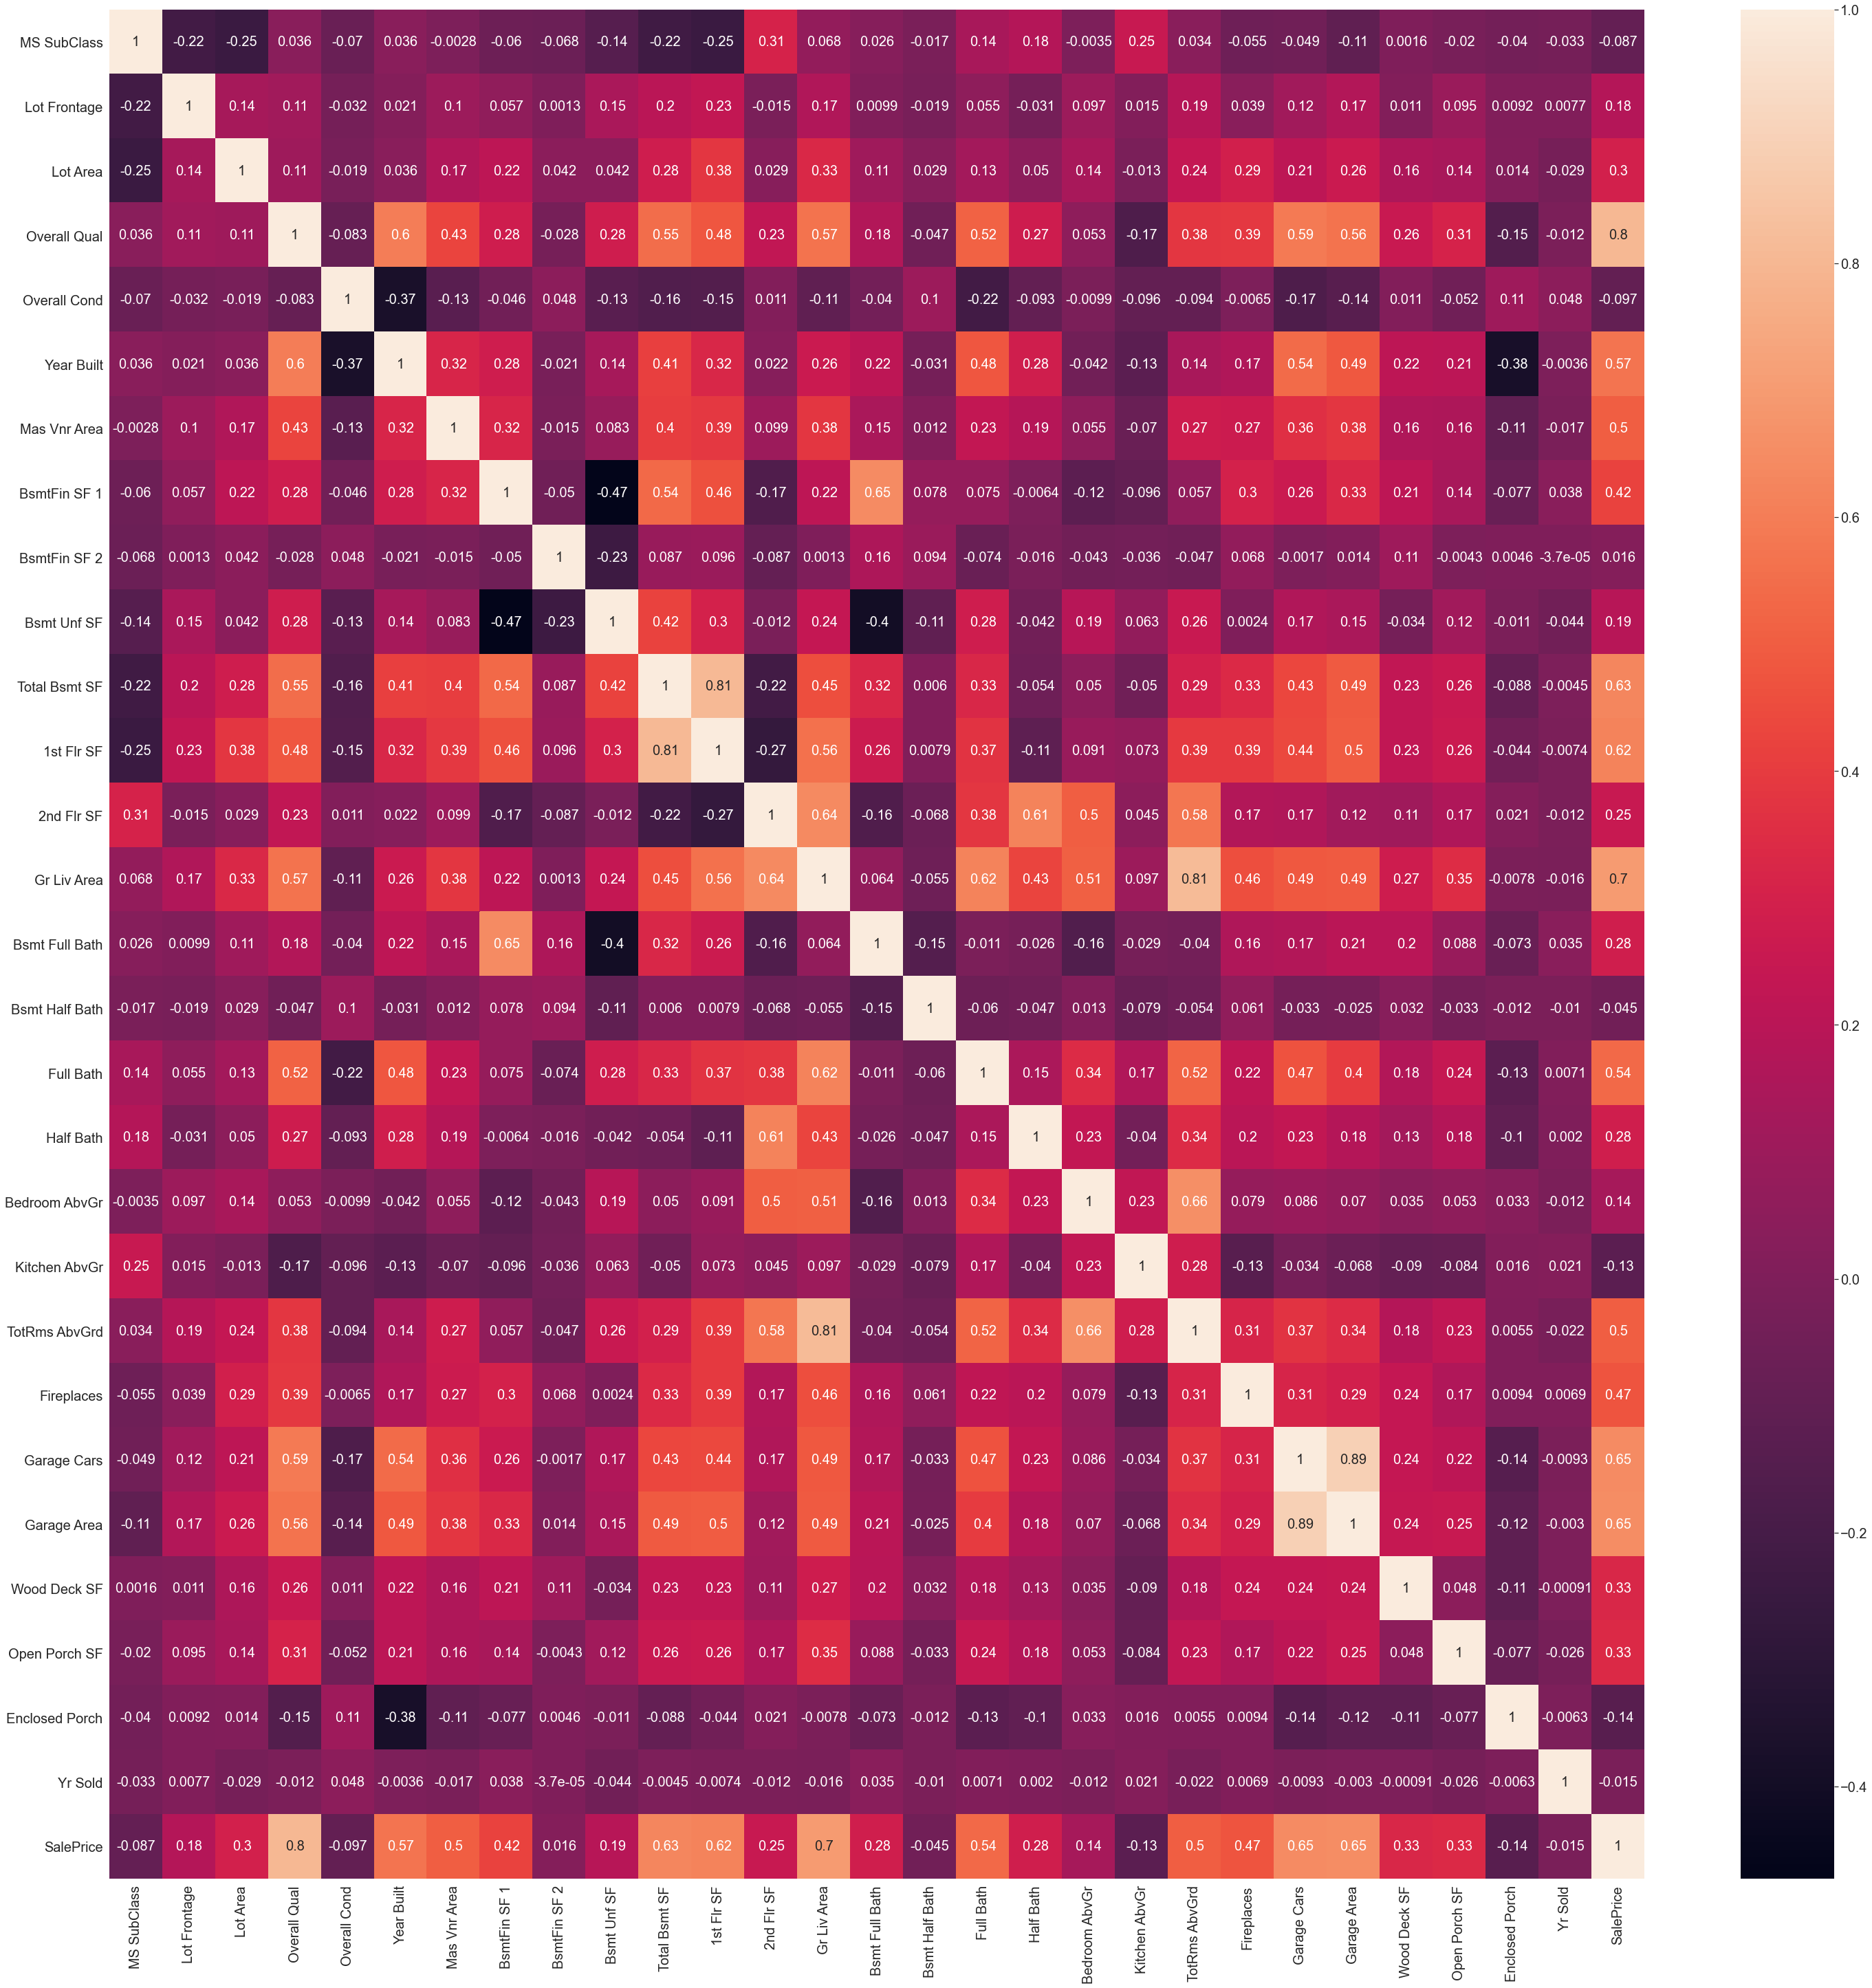

In [159]:
sns.set(rc={"figure.figsize":(50, 50)})
plt.rc('font', size=20) #controls default text size
plt.rc('axes', titlesize=20) #fontsize of the title
plt.rc('axes', labelsize=20) #fontsize of the x and y labels
plt.rc('xtick', labelsize=20) #fontsize of the x tick labels
plt.rc('ytick', labelsize=20) #fontsize of the y tick labels
sns.heatmap(ames.corr(), annot=True);

**High to Low to Negative Correlation with Sale Price**
- Overall Qual - 0.8
- Gnd Liv Area SF - 0.70
- Garage Cars - 0.65
- Garage Area - 0.65
- Total Bsmt SF - 0.63
- 1st Flr SF - 0.62
- Full Bath - 0.54
- Mas Vnr Area - 0.5
- TotalRms AbvGrd - 0.5
- Fireplaces - 0.47
- BsmtFin SF 1 - 0.42
- Wood Deck SF - 0.33
- Open Porch SF - 0.33
- Lot Area - 0.3
- Bsmt Full Bath - 0.28
- Half Bath - 0.28
- 2nd Floor SF - 0.25
- Bsmt Unf SF - 0.19
- Lot Frontage - 0.18
- Screen Porch - 0.13
- 3Ssn Porch - 0.049
- BsmtFin SF 2 - 0.016
- Bedroom AbvGr - 0.14
- Low Qual Fin SF - -0.042
- Bsmt Half Bath - -0.045
- Kitchen AbvGr - -0.13
- Enclosed Porch - -0.14

**Compare Gnd Liv Area vs Sale Price**

Text(0, 0.5, 'Sale Price')

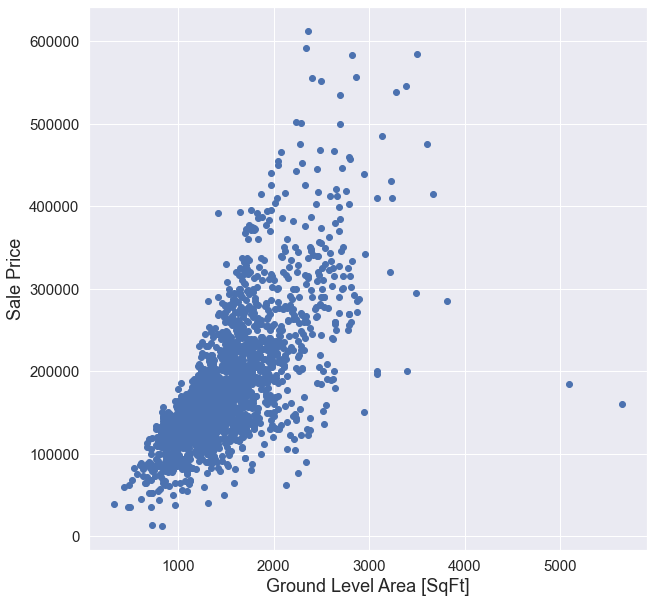

In [160]:
sns.set(rc={"figure.figsize":(10, 10)})
plt.rc('axes', titlesize=18) #fontsize of the title
plt.rc('axes', labelsize=18) #fontsize of the x and y labels
plt.rc('xtick', labelsize=15) #fontsize of the x tick labels
plt.rc('ytick', labelsize=15) #fontsize of the y tick labels
plt.scatter(ames['Gr Liv Area'], ames['SalePrice']);
plt.xlabel('Ground Level Area [SqFt]')
plt.ylabel('Sale Price')

There are two clear outlier where the square footage is very high and the price is low. Remove these row only.

In [161]:
ames.drop(ames.index[ames['Gr Liv Area'] > 4000], inplace=True)

**Compare Garage Cars vs Sale Price**

Text(0, 0.5, 'Sale Price')

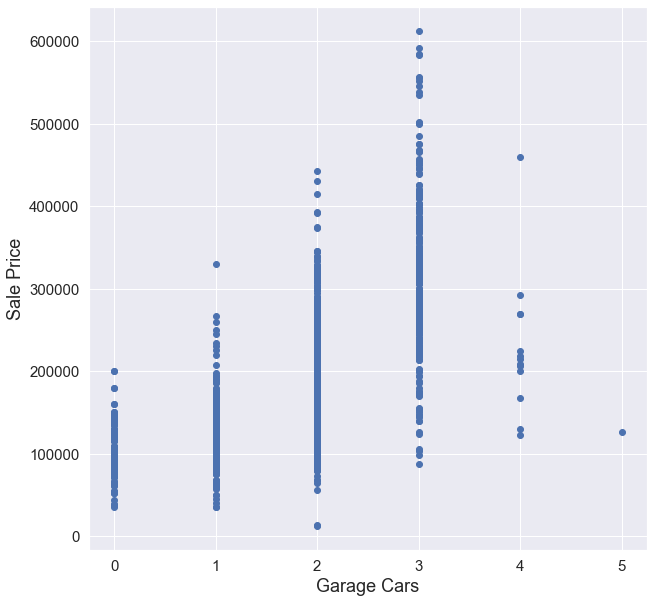

In [162]:
sns.set(rc={"figure.figsize":(10, 10)})
plt.rc('axes', titlesize=18) #fontsize of the title
plt.rc('axes', labelsize=18) #fontsize of the x and y labels
plt.rc('xtick', labelsize=15) #fontsize of the x tick labels
plt.rc('ytick', labelsize=15) #fontsize of the y tick labels
plt.scatter(ames['Garage Cars'], ames['SalePrice']);
plt.xlabel('Garage Cars')
plt.ylabel('Sale Price')

Strange to have one house under 200000 with a 5 car garage, but there are a few homes with a 4 car garage at a similar price. Keep this item.

**Compare Garage Area vs Sale Price**

Text(0, 0.5, 'Sale Price')

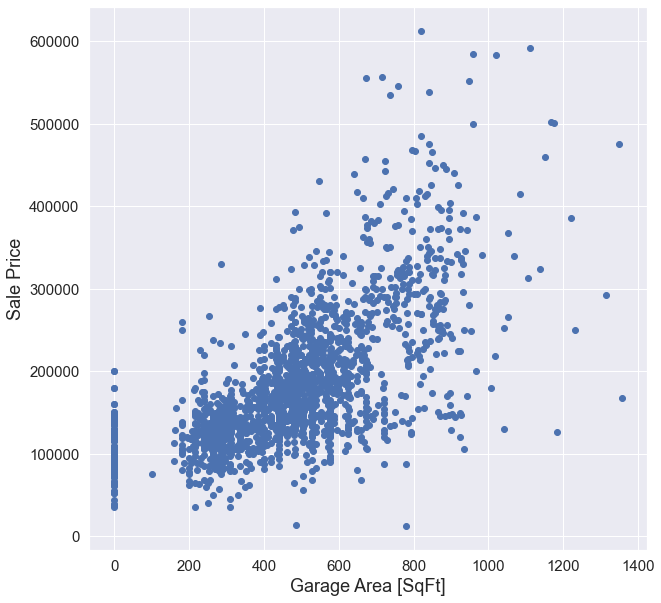

In [163]:
sns.set(rc={"figure.figsize":(10, 10)})
plt.rc('axes', titlesize=18) #fontsize of the title
plt.rc('axes', labelsize=18) #fontsize of the x and y labels
plt.rc('xtick', labelsize=15) #fontsize of the x tick labels
plt.rc('ytick', labelsize=15) #fontsize of the y tick labels
plt.scatter(ames['Garage Area'], ames['SalePrice']);
plt.xlabel('Garage Area [SqFt]')
plt.ylabel('Sale Price')

Zeros represent that there is no garage.

**Compare Total Bsmt SF vs Sale Price**

Text(0, 0.5, 'Sale Price')

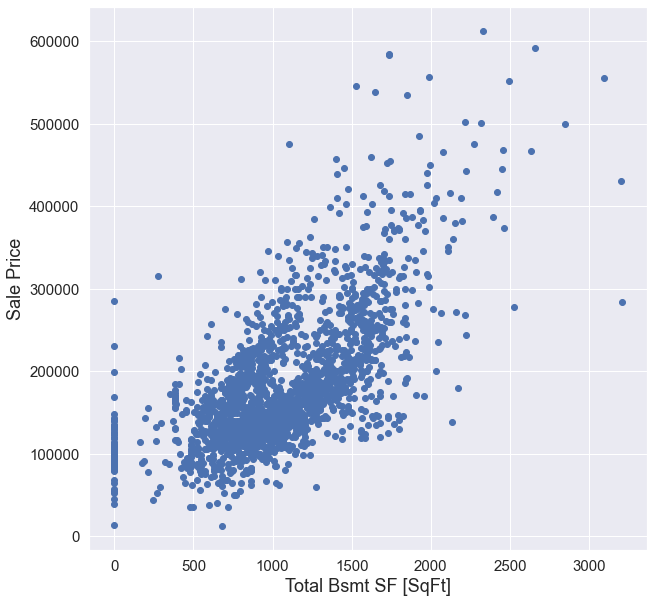

In [164]:
sns.set(rc={"figure.figsize":(10, 10)})
plt.rc('axes', titlesize=18) #fontsize of the title
plt.rc('axes', labelsize=18) #fontsize of the x and y labels
plt.rc('xtick', labelsize=15) #fontsize of the x tick labels
plt.rc('ytick', labelsize=15) #fontsize of the y tick labels
plt.scatter(ames['Total Bsmt SF'], ames['SalePrice']);
plt.xlabel('Total Bsmt SF [SqFt]')
plt.ylabel('Sale Price')

Zero square feet represents no basement.

**Compare 1st Flr SF vs Sale Price**

Text(0, 0.5, 'Sale Price')

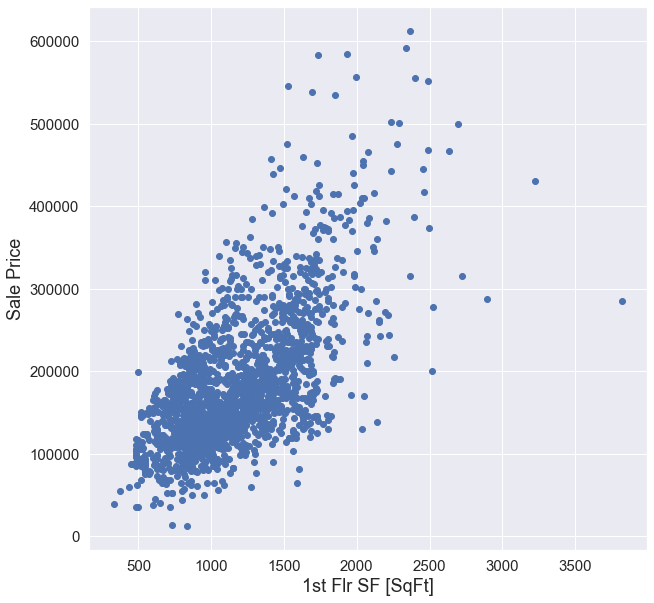

In [165]:
sns.set(rc={"figure.figsize":(10, 10)})
plt.rc('axes', titlesize=18) #fontsize of the title
plt.rc('axes', labelsize=18) #fontsize of the x and y labels
plt.rc('xtick', labelsize=15) #fontsize of the x tick labels
plt.rc('ytick', labelsize=15) #fontsize of the y tick labels
plt.scatter(ames['1st Flr SF'], ames['SalePrice']);
plt.xlabel('1st Flr SF [SqFt]')
plt.ylabel('Sale Price')

No significant outliers.

**Compare Full Bath vs Sale Price**

Text(0, 0.5, 'Sale Price')

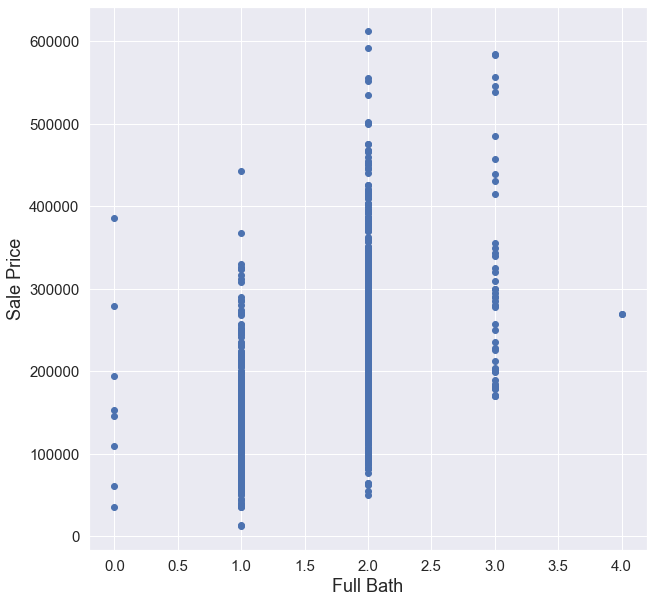

In [166]:
sns.set(rc={"figure.figsize":(10, 10)})
plt.rc('axes', titlesize=18) #fontsize of the title
plt.rc('axes', labelsize=18) #fontsize of the x and y labels
plt.rc('xtick', labelsize=15) #fontsize of the x tick labels
plt.rc('ytick', labelsize=15) #fontsize of the y tick labels
plt.scatter(ames['Full Bath'], ames['SalePrice']);
plt.xlabel('Full Bath')
plt.ylabel('Sale Price')

Does the same house have a 5 car garage and 4 bathrooms?

In [167]:
ames[ames['Full Bath'] > 3.5]

,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Lot Config,Land Slope,Neighborhood,Condition 1,Condition 2,Bldg Type,House Style,Overall Qual,Overall Cond,Year Built,Roof Style,Roof Matl,Exterior 1st,Exterior 2nd,Mas Vnr Type,Mas Vnr Area,Exter Qual,Exter Cond,Foundation,Bsmt Qual,Bsmt Cond,Bsmt Exposure,BsmtFin Type 1,BsmtFin SF 1,BsmtFin Type 2,BsmtFin SF 2,Bsmt Unf SF,Total Bsmt SF,Heating,Heating QC,Central Air,Electrical,1st Flr SF,2nd Flr SF,Gr Liv Area,Bsmt Full Bath,Bsmt Half Bath,Full Bath,Half Bath,Bedroom AbvGr,Kitchen AbvGr,Kitchen Qual,TotRms AbvGrd,Functional,Fireplaces,Fireplace Qu,Garage Type,Garage Finish,Garage Cars,Garage Area,Garage Qual,Garage Cond,Paved Drive,Wood Deck SF,Open Porch SF,Enclosed Porch,Fence,Mo Sold,Yr Sold,Sale Type,SalePrice,Year Remod/Add Cats,Low Qual SF Cat,Garage Yr Blt Class,Porch Cat,Screen Porch Cat
1566,90,RL,0.0,11855,Pave,None,Reg,Lvl,Inside,Gtl,SawyerW,Norm,Norm,Duplex,2Story,7,5,2000,Hip,CompShg,VinylSd,VinylSd,HasMasVnr,23.0,TA,TA,PConc,Ex,TA,No,GLQ,820.0,Unf,0.0,348.0,1168.0,GasA,Ex,Y,SBrkr,1168,1619,2787,2.0,0.0,4,2,6,2,TA,8,Typ,2,TA,BuiltIn,Fin,4.0,820.0,TA,TA,Y,312,0,0,Non,10,2009,WD,269500,Blt/Remod<10 yrs,Finished,After 2000,No3SeasonPorch,NoScreenPorch
1605,90,RL,0.0,7939,Pave,None,Reg,Lvl,Inside,Gtl,SawyerW,Feedr,Norm,Duplex,2Story,7,5,2000,Hip,CompShg,VinylSd,VinylSd,HasMasVnr,23.0,TA,TA,PConc,Ex,TA,No,GLQ,820.0,Unf,0.0,348.0,1168.0,GasA,Ex,Y,SBrkr,1168,1619,2787,2.0,0.0,4,2,6,2,TA,8,Typ,2,TA,BuiltIn,Fin,4.0,820.0,TA,TA,Y,312,0,0,Non,10,2009,WD,269500,Blt/Remod<10 yrs,Finished,After 2000,No3SeasonPorch,NoScreenPorch


Interesting that there are two items with the similar info, both have 4 bathrooms sold for the same price, but have different lot areas.

In [168]:
ames[ames['Garage Cars'] > 4.5]

,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Lot Config,Land Slope,Neighborhood,Condition 1,Condition 2,Bldg Type,House Style,Overall Qual,Overall Cond,Year Built,Roof Style,Roof Matl,Exterior 1st,Exterior 2nd,Mas Vnr Type,Mas Vnr Area,Exter Qual,Exter Cond,Foundation,Bsmt Qual,Bsmt Cond,Bsmt Exposure,BsmtFin Type 1,BsmtFin SF 1,BsmtFin Type 2,BsmtFin SF 2,Bsmt Unf SF,Total Bsmt SF,Heating,Heating QC,Central Air,Electrical,1st Flr SF,2nd Flr SF,Gr Liv Area,Bsmt Full Bath,Bsmt Half Bath,Full Bath,Half Bath,Bedroom AbvGr,Kitchen AbvGr,Kitchen Qual,TotRms AbvGrd,Functional,Fireplaces,Fireplace Qu,Garage Type,Garage Finish,Garage Cars,Garage Area,Garage Qual,Garage Cond,Paved Drive,Wood Deck SF,Open Porch SF,Enclosed Porch,Fence,Mo Sold,Yr Sold,Sale Type,SalePrice,Year Remod/Add Cats,Low Qual SF Cat,Garage Yr Blt Class,Porch Cat,Screen Porch Cat
925,30,RM,50.0,8635,Pave,None,Reg,Lvl,Inside,Gtl,BrkSide,Norm,Norm,1Fam,1Story,5,5,1925,Hip,CompShg,Wd Sdng,Wd Sdng,None,0.0,TA,Fa,BrkTil,TA,TA,No,LwQ,134.0,Unf,0.0,938.0,1072.0,GasA,TA,Y,SBrkr,1072,0,1072,1.0,0.0,1,0,2,1,TA,5,Typ,0,None,Detchd,Unf,5.0,1184.0,Fa,TA,P,0,0,105,Non,8,2009,WD,126500,Blt/Remod>20 yrs,Finished,Before 2000,No3SeasonPorch,NoScreenPorch


The house with 5 cars is not the same as the houses with 3 bathrooms. Keep these items.

**Compare Mas Vnr Area vs Sale Price**

Text(0, 0.5, 'Sale Price')

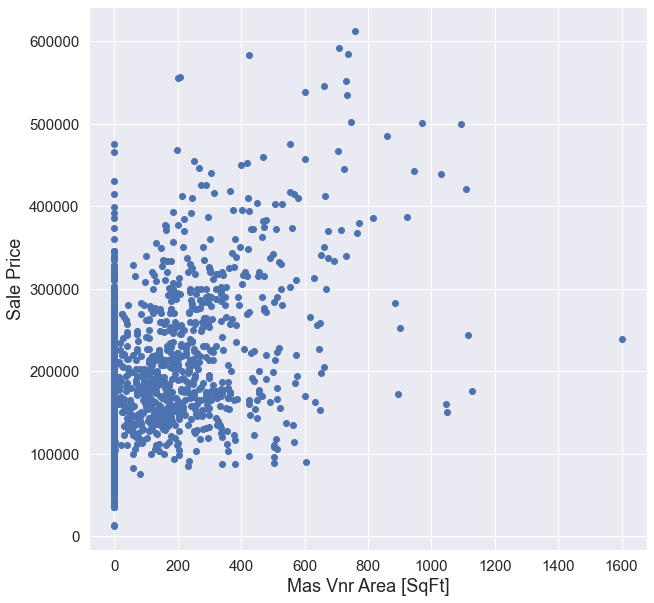

In [169]:
sns.set(rc={"figure.figsize":(10, 10)})
plt.rc('axes', titlesize=18) #fontsize of the title
plt.rc('axes', labelsize=18) #fontsize of the x and y labels
plt.rc('xtick', labelsize=15) #fontsize of the x tick labels
plt.rc('ytick', labelsize=15) #fontsize of the y tick labels
plt.scatter(ames['Mas Vnr Area'], ames['SalePrice']);
plt.xlabel('Mas Vnr Area [SqFt]')
plt.ylabel('Sale Price')

One item possibly could be considered an outlier, but masonary vnr is just the siding of the house, so this is possible. 

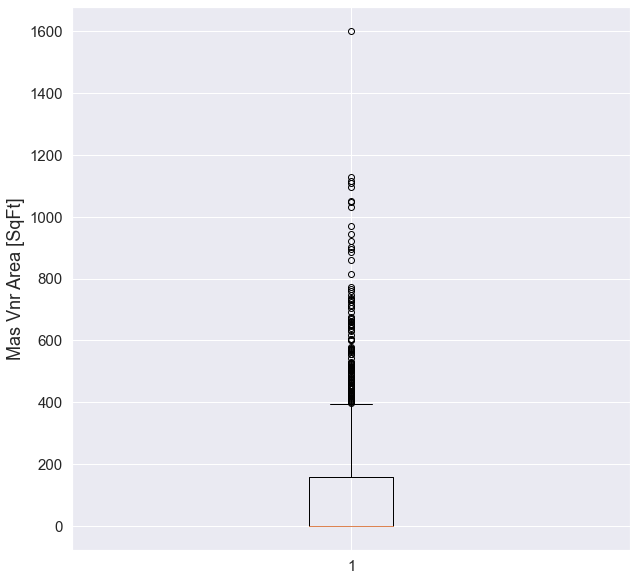

In [170]:
plt.boxplot(ames['Mas Vnr Area'])
plt.ylabel('Mas Vnr Area [SqFt]');

The boxplot makes it look like the 1600 sqft mas vnr is an outlier. Remove point.

In [171]:
ames.drop(ames.index[ames['Mas Vnr Area'] > 1400], inplace=True)

**Compare TotalRms AbvGrd vs Sale Price**

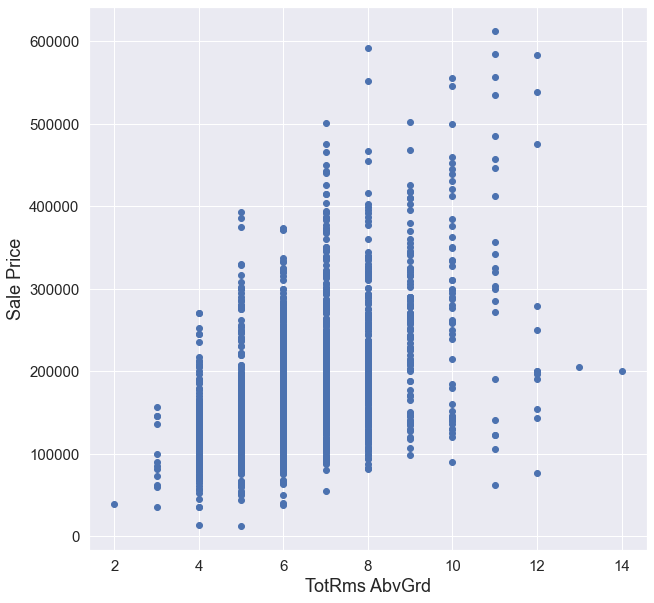

In [172]:
sns.set(rc={"figure.figsize":(10, 10)})
plt.rc('axes', titlesize=18) #fontsize of the title
plt.rc('axes', labelsize=18) #fontsize of the x and y labels
plt.rc('xtick', labelsize=15) #fontsize of the x tick labels
plt.rc('ytick', labelsize=15) #fontsize of the y tick labels
plt.scatter(ames['TotRms AbvGrd'], ames['SalePrice']);
plt.xlabel('TotRms AbvGrd')
plt.ylabel('Sale Price');

There seems to be many homes with over 10 rooms up to 14. So the 12-14 room homes won't be considered outliers.

**Compare Fireplaces vs Sale Price**

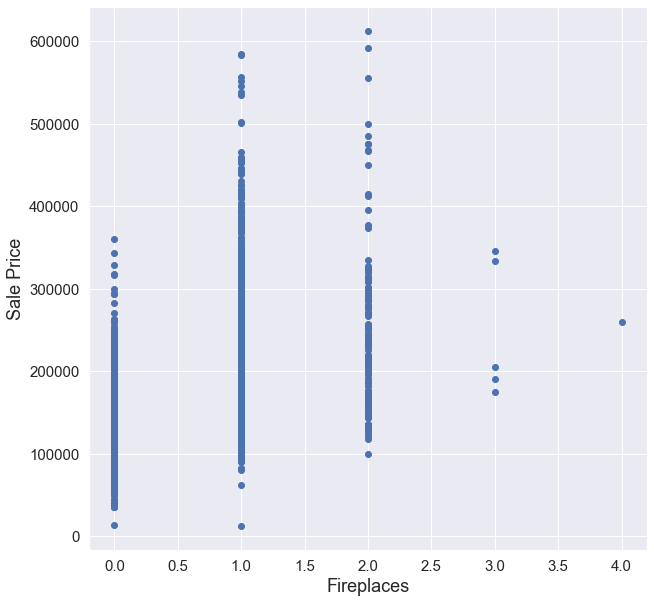

In [173]:
sns.set(rc={"figure.figsize":(10, 10)})
plt.rc('axes', titlesize=18) #fontsize of the title
plt.rc('axes', labelsize=18) #fontsize of the x and y labels
plt.rc('xtick', labelsize=15) #fontsize of the x tick labels
plt.rc('ytick', labelsize=15) #fontsize of the y tick labels
plt.scatter(ames['Fireplaces'], ames['SalePrice']);
plt.xlabel('Fireplaces')
plt.ylabel('Sale Price');

There is one house with 4 fireplaces. I won't call this an outlier.

In [174]:
ames[ames['Fireplaces'] > 3.5]

,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Lot Config,Land Slope,Neighborhood,Condition 1,Condition 2,Bldg Type,House Style,Overall Qual,Overall Cond,Year Built,Roof Style,Roof Matl,Exterior 1st,Exterior 2nd,Mas Vnr Type,Mas Vnr Area,Exter Qual,Exter Cond,Foundation,Bsmt Qual,Bsmt Cond,Bsmt Exposure,BsmtFin Type 1,BsmtFin SF 1,BsmtFin Type 2,BsmtFin SF 2,Bsmt Unf SF,Total Bsmt SF,Heating,Heating QC,Central Air,Electrical,1st Flr SF,2nd Flr SF,Gr Liv Area,Bsmt Full Bath,Bsmt Half Bath,Full Bath,Half Bath,Bedroom AbvGr,Kitchen AbvGr,Kitchen Qual,TotRms AbvGrd,Functional,Fireplaces,Fireplace Qu,Garage Type,Garage Finish,Garage Cars,Garage Area,Garage Qual,Garage Cond,Paved Drive,Wood Deck SF,Open Porch SF,Enclosed Porch,Fence,Mo Sold,Yr Sold,Sale Type,SalePrice,Year Remod/Add Cats,Low Qual SF Cat,Garage Yr Blt Class,Porch Cat,Screen Porch Cat
761,80,RL,100.0,14330,Pave,None,IR,Low,Corner,Gtl,Veenker,Norm,Norm,1Fam,SLvl,7,4,1974,Gable,CompShg,WdShing,Wd Sdng,HasMasVnr,145.0,Gd,Fa,CBlock,Gd,TA,Gd,ALQ,1023.0,BLQ,497.0,228.0,1748.0,GasA,Gd,Y,SBrkr,2151,495,2646,1.0,2.0,2,0,3,1,Gd,9,Mod,4,TA,Attchd,RFn,2.0,550.0,TA,TA,Y,641,100,0,GdPrv,1,2006,WD,260000,Blt/Remod>20 yrs,Finished,Before 2000,No3SeasonPorch,NoScreenPorch


**Compare BsmtFin SF 1 vs Sale Price**

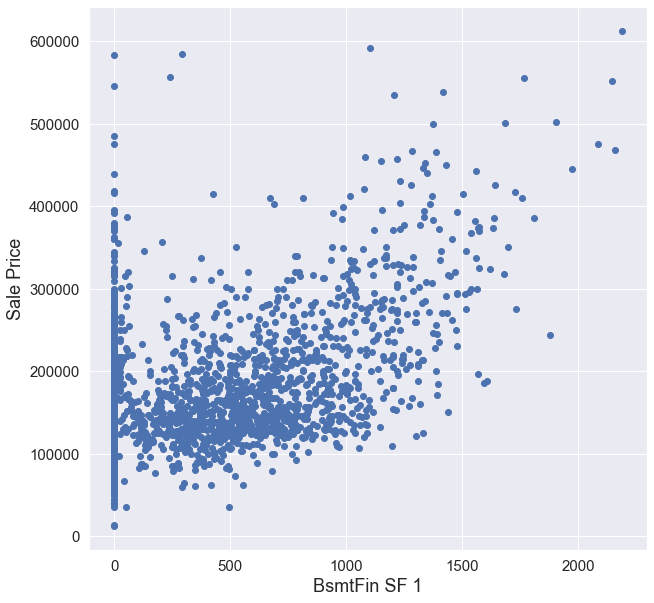

In [175]:
sns.set(rc={"figure.figsize":(10, 10)})
plt.rc('axes', titlesize=18) #fontsize of the title
plt.rc('axes', labelsize=18) #fontsize of the x and y labels
plt.rc('xtick', labelsize=15) #fontsize of the x tick labels
plt.rc('ytick', labelsize=15) #fontsize of the y tick labels
plt.scatter(ames['BsmtFin SF 1'], ames['SalePrice']);
plt.xlabel('BsmtFin SF 1')
plt.ylabel('Sale Price');

Large range of homes without a finished basement or without a basement all together.

**Compare Wood Deck SF vs Sale Price**

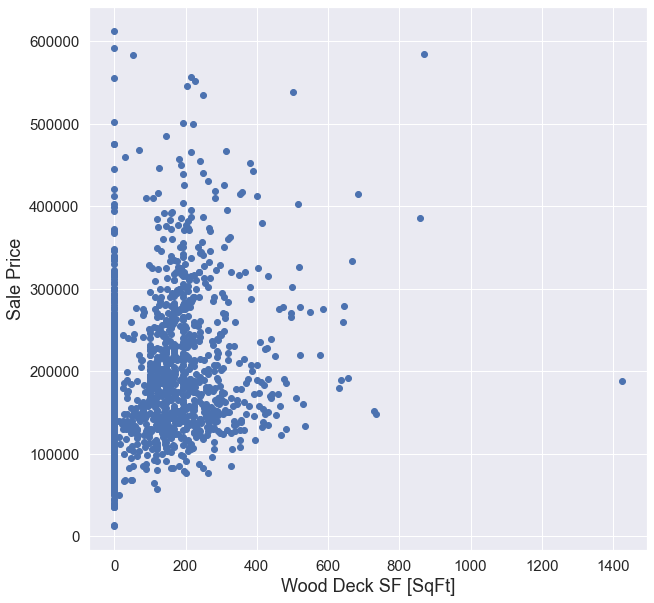

In [176]:
sns.set(rc={"figure.figsize":(10, 10)})
plt.rc('axes', titlesize=18) #fontsize of the title
plt.rc('axes', labelsize=18) #fontsize of the x and y labels
plt.rc('xtick', labelsize=15) #fontsize of the x tick labels
plt.rc('ytick', labelsize=15) #fontsize of the y tick labels
plt.scatter(ames['Wood Deck SF'], ames['SalePrice']);
plt.xlabel('Wood Deck SF [SqFt]')
plt.ylabel('Sale Price');

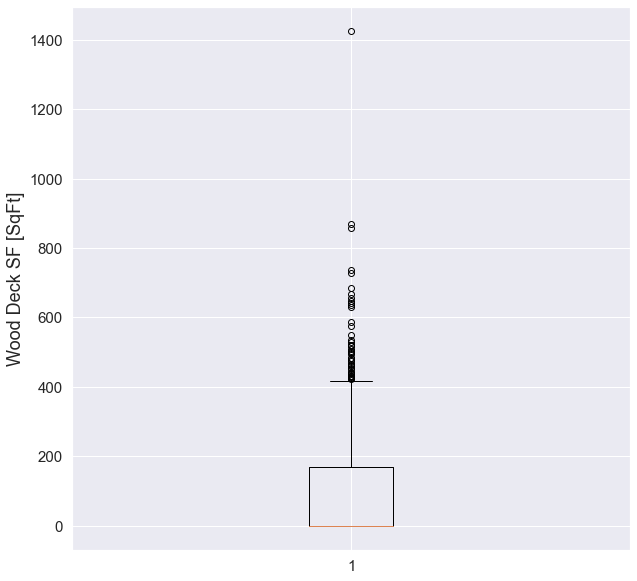

In [177]:
plt.boxplot(ames['Wood Deck SF'])
plt.ylabel('Wood Deck SF [SqFt]');

Point is about 1.5x more than the next highest value, and based on the boxplot, this point over 1400 sqft can be considered an outlier.

In [178]:
ames.drop(ames.index[ames['Wood Deck SF'] > 1400], inplace=True)

**Compare Open Porch SF vs Sale Price**

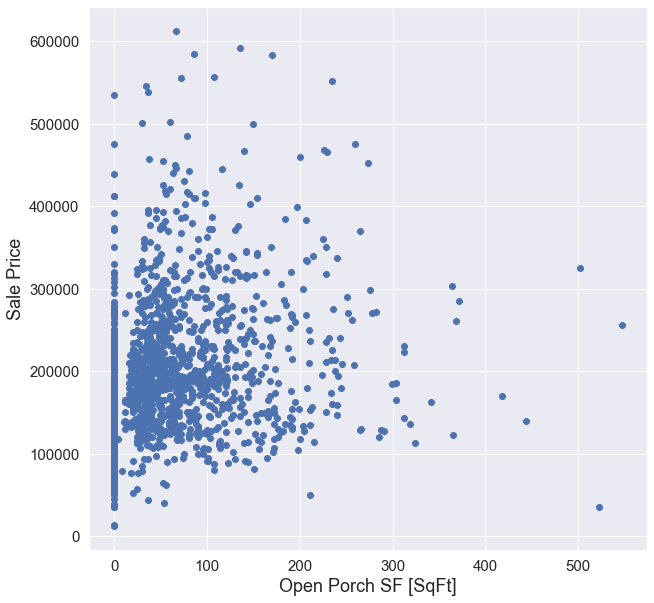

In [179]:
sns.set(rc={"figure.figsize":(10, 10)})
plt.rc('axes', titlesize=18) #fontsize of the title
plt.rc('axes', labelsize=18) #fontsize of the x and y labels
plt.rc('xtick', labelsize=15) #fontsize of the x tick labels
plt.rc('ytick', labelsize=15) #fontsize of the y tick labels
plt.scatter(ames['Open Porch SF'], ames['SalePrice']);
plt.xlabel('Open Porch SF [SqFt]')
plt.ylabel('Sale Price');

There are two porches over 200Sqft that sold for well under 100000. There isn't enough info to know why a house sold for under 100000 in Ames in 2010 to know if these are true outliers. These points don't show up as outliers in other plots.

**Compare Lot Area vs Sale Price**

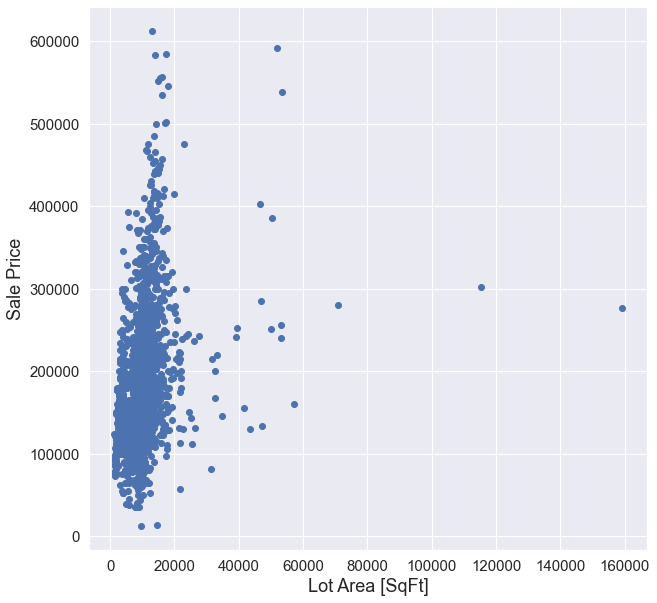

In [180]:
sns.set(rc={"figure.figsize":(10, 10)})
plt.rc('axes', titlesize=18) #fontsize of the title
plt.rc('axes', labelsize=18) #fontsize of the x and y labels
plt.rc('xtick', labelsize=15) #fontsize of the x tick labels
plt.rc('ytick', labelsize=15) #fontsize of the y tick labels
plt.scatter(ames['Lot Area'], ames['SalePrice']);
plt.xlabel('Lot Area [SqFt]')
plt.ylabel('Sale Price');

There are a couple more significant outliers at over 11000.

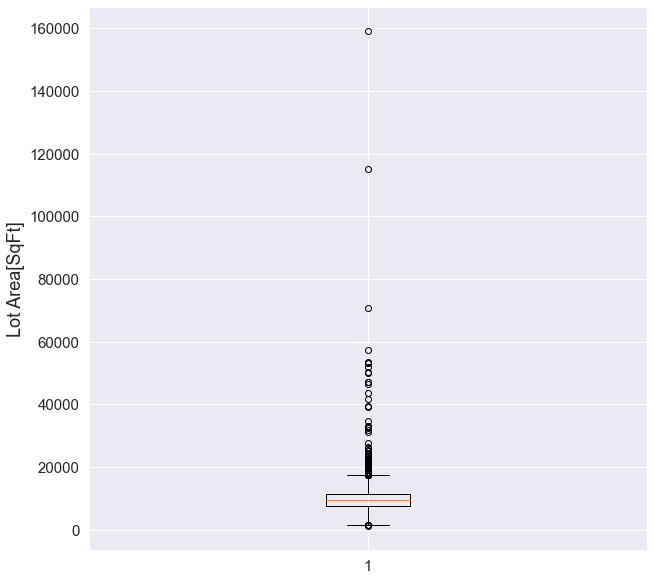

In [181]:
plt.boxplot(ames['Lot Area'])
plt.ylabel('Lot Area[SqFt]');

In [182]:
ames[ames['Lot Area']>110000]

,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Lot Config,Land Slope,Neighborhood,Condition 1,Condition 2,Bldg Type,House Style,Overall Qual,Overall Cond,Year Built,Roof Style,Roof Matl,Exterior 1st,Exterior 2nd,Mas Vnr Type,Mas Vnr Area,Exter Qual,Exter Cond,Foundation,Bsmt Qual,Bsmt Cond,Bsmt Exposure,BsmtFin Type 1,BsmtFin SF 1,BsmtFin Type 2,BsmtFin SF 2,Bsmt Unf SF,Total Bsmt SF,Heating,Heating QC,Central Air,Electrical,1st Flr SF,2nd Flr SF,Gr Liv Area,Bsmt Full Bath,Bsmt Half Bath,Full Bath,Half Bath,Bedroom AbvGr,Kitchen AbvGr,Kitchen Qual,TotRms AbvGrd,Functional,Fireplaces,Fireplace Qu,Garage Type,Garage Finish,Garage Cars,Garage Area,Garage Qual,Garage Cond,Paved Drive,Wood Deck SF,Open Porch SF,Enclosed Porch,Fence,Mo Sold,Yr Sold,Sale Type,SalePrice,Year Remod/Add Cats,Low Qual SF Cat,Garage Yr Blt Class,Porch Cat,Screen Porch Cat
471,50,RL,0.0,159000,Pave,None,IR,Low,CulDSac,Sev,ClearCr,Norm,Norm,1Fam,1.5Fin,6,7,1958,Gable,CompShg,Wd Sdng,HdBoard,HasMasVnr,472.0,Gd,TA,CBlock,Gd,TA,Gd,Rec,697.0,Unf,0.0,747.0,1444.0,GasA,Gd,Y,SBrkr,1444,700,2144,0.0,1.0,2,0,4,1,Gd,7,Typ,2,TA,Attchd,Fin,2.0,389.0,TA,TA,Y,0,98,0,Non,6,2007,WD,277000,Blt/Remod<10 yrs,Finished,Before 2000,No3SeasonPorch,NoScreenPorch
694,20,RL,0.0,115149,Pave,None,IR,Low,CulDSac,Sev,ClearCr,Norm,Norm,1Fam,1Story,7,5,1971,Gable,CompShg,Plywood,Plywood,HasMasVnr,351.0,TA,TA,CBlock,Gd,TA,Gd,GLQ,1219.0,Unf,0.0,424.0,1643.0,GasA,TA,Y,SBrkr,1824,0,1824,1.0,0.0,2,0,2,1,Gd,5,Typ,2,TA,Attchd,Unf,2.0,739.0,TA,TA,Y,380,48,0,Non,6,2007,WD,302000,Blt/Remod<10 yrs,Finished,Before 2000,No3SeasonPorch,NoScreenPorch


Two properties have over 110,000 sqft of lot but sold for an average price. But the properties are also both on culdesacs. Seems abnormal.

In [183]:
ames.drop(ames.index[ames['Lot Area'] > 110000], inplace=True)

## Summary Statistics

In [184]:
ames.describe()

,MS SubClass,Lot Frontage,Lot Area,Overall Qual,Overall Cond,Year Built,Mas Vnr Area,BsmtFin SF 1,BsmtFin SF 2,Bsmt Unf SF,Total Bsmt SF,1st Flr SF,2nd Flr SF,Gr Liv Area,Bsmt Full Bath,Bsmt Half Bath,Full Bath,Half Bath,Bedroom AbvGr,Kitchen AbvGr,TotRms AbvGrd,Fireplaces,Garage Cars,Garage Area,Wood Deck SF,Open Porch SF,Enclosed Porch,Yr Sold,SalePrice
count,2045.000000,2045.000000,2045.000000,2045.000000,2045.000000,2045.000000,2045.000000,2045.000000,2045.000000,2045.000000,2045.000000,2045.000000,2045.000000,2045.000000,2045.000000,2045.000000,2045.000000,2045.000000,2045.000000,2045.000000,2045.000000,2045.000000,2045.000000,2045.000000,2045.000000,2045.000000,2045.000000,2045.000000,2045.000000
mean,57.034230,57.866504,9898.806846,6.107579,5.562347,1971.665526,96.743276,436.845477,48.076284,567.578973,1052.500733,1160.380929,329.011736,1494.921760,0.425428,0.062592,1.576039,0.370660,2.843521,1.043032,6.429340,0.587286,1.774572,472.480685,92.855257,47.240587,22.638142,2007.777506,181342.057702
std,42.867997,32.590072,5239.931883,1.422893,1.105338,30.193855,168.553551,439.589845,165.185518,445.339736,426.920222,379.054344,425.568787,485.878624,0.520555,0.250233,0.549607,0.500997,0.826993,0.210085,1.545627,0.634799,0.765920,214.808997,124.704067,65.899213,59.920366,1.313367,79290.089575
min,20.000000,0.000000,1300.000000,1.000000,1.000000,1872.000000,0.000000,0.000000,0.000000,0.000000,0.000000,334.000000,0.000000,334.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2006.000000,12789.000000
25%,20.000000,44.000000,7500.000000,5.000000,5.000000,1953.000000,0.000000,0.000000,0.000000,220.000000,793.000000,879.000000,0.000000,1128.000000,0.000000,0.000000,1.000000,0.000000,2.000000,1.000000,5.000000,0.000000,1.000000,319.000000,0.000000,0.000000,0.000000,2007.000000,129500.000000
50%,50.000000,63.000000,9400.000000,6.000000,5.000000,1974.000000,0.000000,368.000000,0.000000,475.000000,994.000000,1092.000000,0.000000,1442.000000,0.000000,0.000000,2.000000,0.000000,3.000000,1.000000,6.000000,1.000000,2.000000,480.000000,0.000000,26.000000,0.000000,2008.000000,162000.000000
75%,70.000000,78.000000,11500.000000,7.000000,6.000000,2001.000000,157.000000,732.000000,0.000000,811.000000,1316.000000,1403.000000,690.000000,1728.000000,1.000000,0.000000,2.000000,1.000000,3.000000,1.000000,7.000000,1.000000,2.000000,576.000000,168.000000,70.000000,0.000000,2009.000000,214000.000000
max,190.000000,313.000000,70761.000000,10.000000,9.000000,2010.000000,1129.000000,2188.000000,1474.000000,2336.000000,3206.000000,3820.000000,1862.000000,3820.000000,3.000000,2.000000,4.000000,2.000000,8.000000,3.000000,14.000000,4.000000,5.000000,1356.000000,870.000000,547.000000,432.000000,2010.000000,611657.000000


**Sale Price Distribution**

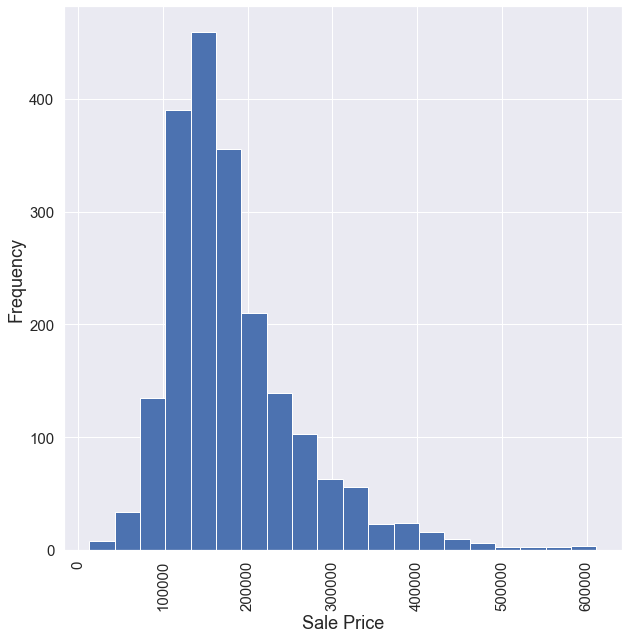

In [185]:
sns.set(rc={"figure.figsize":(10, 10)})
plt.rc('axes', titlesize=18) #fontsize of the title
plt.rc('axes', labelsize=18) #fontsize of the x and y labels
plt.rc('xtick', labelsize=15) #fontsize of the x tick labels
plt.rc('ytick', labelsize=15) #fontsize of the y tick labels
plt.hist(ames['SalePrice'], bins=20)
plt.xlabel('Sale Price')
plt.ylabel('Frequency')
plt.xticks(rotation=90);

Mean sale price over this period in 2010 is 181447 with a standard deviation of 79324. Distribution is right skewed meaning that the mean of the distribution is to the right of the peak values due to the higher priced homes.

In [186]:
# Convert Sale Price to Log for normal distribution
ames['SalePrice'] = np.log(ames['SalePrice'])

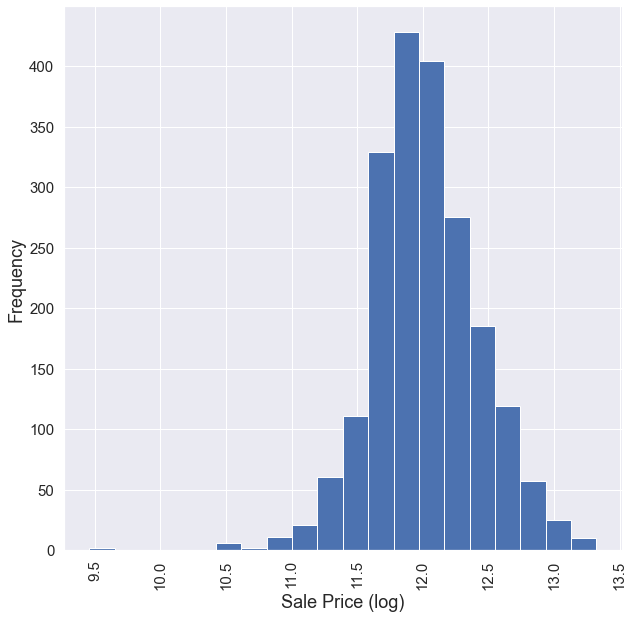

In [187]:
sns.set(rc={"figure.figsize":(10, 10)})
plt.rc('axes', titlesize=18) #fontsize of the title
plt.rc('axes', labelsize=18) #fontsize of the x and y labels
plt.rc('xtick', labelsize=15) #fontsize of the x tick labels
plt.rc('ytick', labelsize=15) #fontsize of the y tick labels
plt.hist(ames['SalePrice'], bins=20)
plt.xlabel('Sale Price (log)')
plt.ylabel('Frequency')
plt.xticks(rotation=90);

**Ground Living Area Square Feet Distribution**

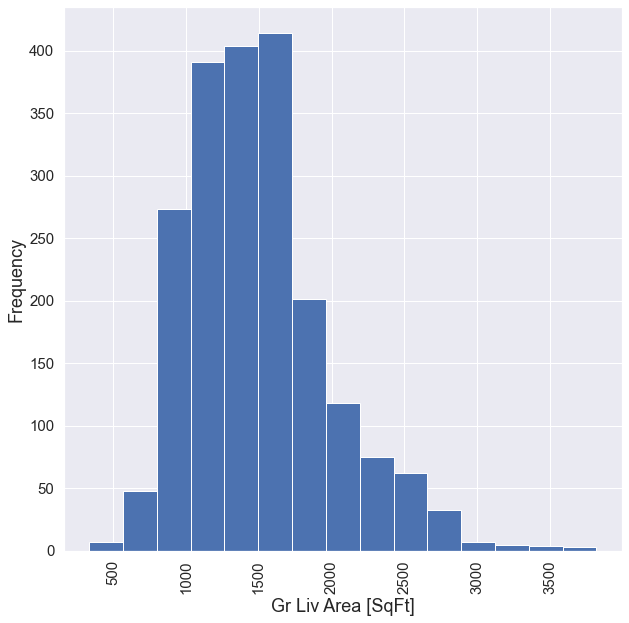

In [188]:
sns.set(rc={"figure.figsize":(10, 10)})
plt.rc('axes', titlesize=18) #fontsize of the title
plt.rc('axes', labelsize=18) #fontsize of the x and y labels
plt.rc('xtick', labelsize=15) #fontsize of the x tick labels
plt.rc('ytick', labelsize=15) #fontsize of the y tick labels
plt.hist(ames['Gr Liv Area'], bins=15)
plt.xlabel('Gr Liv Area [SqFt]')
plt.ylabel('Frequency')
plt.xticks(rotation=90);

Mean living area is 1495 sqft and distribution is right skewed. Ground Living Area square footage is the highest correlated value to sales price, so it is expected that their distributions will be similar.

In [189]:
ames['Gr Liv Area'].mean()

1494.921760391198

### Save clean data file

In [190]:
ames.to_csv('datasets/ames_clean.csv', index=False)

In [188]:
ames = pd.read_csv('datasets/ames_clean.csv')

In [189]:
ames.head()

,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Lot Config,Land Slope,Neighborhood,Condition 1,Condition 2,Bldg Type,House Style,Overall Qual,Overall Cond,Year Built,Roof Style,Roof Matl,Exterior 1st,Exterior 2nd,Mas Vnr Type,Mas Vnr Area,Exter Qual,Exter Cond,Foundation,Bsmt Qual,Bsmt Cond,Bsmt Exposure,BsmtFin Type 1,BsmtFin SF 1,BsmtFin Type 2,BsmtFin SF 2,Bsmt Unf SF,Total Bsmt SF,Heating,Heating QC,Central Air,Electrical,1st Flr SF,2nd Flr SF,Gr Liv Area,Bsmt Full Bath,Bsmt Half Bath,Full Bath,Half Bath,Bedroom AbvGr,Kitchen AbvGr,Kitchen Qual,TotRms AbvGrd,Functional,Fireplaces,Fireplace Qu,Garage Type,Garage Finish,Garage Cars,Garage Area,Garage Qual,Garage Cond,Paved Drive,Wood Deck SF,Open Porch SF,Enclosed Porch,Fence,Mo Sold,Yr Sold,Sale Type,SalePrice,Year Remod/Add Cats,Low Qual SF Cat,Garage Yr Blt Class,Porch Cat,Screen Porch Cat
0,60,RL,0.0,13517,Pave,None,IR,Lvl,CulDSac,Gtl,Sawyer,RR,Norm,1Fam,2Story,6,8,1976,Gable,CompShg,HdBoard,Plywood,HasMasVnr,289.0,Gd,TA,CBlock,TA,TA,No,GLQ,533.0,Unf,0.0,192.0,725.0,GasA,Ex,Y,SBrkr,725,754,1479,0.0,0.0,2,1,3,1,Gd,6,Typ,0,None,Attchd,RFn,2.0,475.0,TA,TA,Y,0,44,0,Non,3,2010,WD,130500,Blt/Remod<10 yrs,Finished,Before 2000,No3SeasonPorch,NoScreenPorch
1,60,RL,43.0,11492,Pave,None,IR,Lvl,CulDSac,Gtl,SawyerW,Norm,Norm,1Fam,2Story,7,5,1996,Gable,CompShg,VinylSd,VinylSd,HasMasVnr,132.0,Gd,TA,PConc,Gd,TA,No,GLQ,637.0,Unf,0.0,276.0,913.0,GasA,Ex,Y,SBrkr,913,1209,2122,1.0,0.0,2,1,4,1,Gd,8,Typ,1,TA,Attchd,RFn,2.0,559.0,TA,TA,Y,0,74,0,Non,4,2009,WD,220000,Blt/Remod 10-20 yrs,Finished,Before 2000,No3SeasonPorch,NoScreenPorch
2,20,RL,68.0,7922,Pave,None,Reg,Lvl,Inside,Gtl,NAmes,Norm,Norm,1Fam,1Story,5,7,1953,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,Gd,CBlock,TA,TA,No,GLQ,731.0,Unf,0.0,326.0,1057.0,GasA,TA,Y,SBrkr,1057,0,1057,1.0,0.0,1,0,3,1,Gd,5,Typ,0,None,Detchd,Unf,1.0,246.0,TA,TA,Y,0,52,0,Non,1,2010,WD,109000,Blt/Remod<10 yrs,Finished,Before 2000,No3SeasonPorch,NoScreenPorch
3,60,RL,73.0,9802,Pave,None,Reg,Lvl,Inside,Gtl,Timber,Norm,Norm,1Fam,2Story,5,5,2006,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,PConc,Gd,TA,No,Unf,0.0,Unf,0.0,384.0,384.0,GasA,Gd,Y,SBrkr,744,700,1444,0.0,0.0,2,1,3,1,TA,7,Typ,0,None,BuiltIn,Fin,2.0,400.0,TA,TA,Y,100,0,0,Non,4,2010,WD,174000,Blt/Remod<10 yrs,Finished,After 2000,No3SeasonPorch,NoScreenPorch
4,50,RL,82.0,14235,Pave,None,IR,Lvl,Inside,Gtl,SawyerW,Norm,Norm,1Fam,1.5Fin,6,8,1900,Gable,CompShg,Wd Sdng,Plywood,None,0.0,TA,TA,PConc,Fa,Gd,No,Unf,0.0,Unf,0.0,676.0,676.0,GasA,TA,Y,SBrkr,831,614,1445,0.0,0.0,2,0,3,1,TA,6,Typ,0,None,Detchd,Unf,2.0,484.0,TA,TA,N,0,59,0,Non,3,2010,WD,138500,Blt/Remod 10-20 yrs,Finished,Before 2000,No3SeasonPorch,NoScreenPorch


**Verify No Null Values**

In [191]:
ames.isnull().sum()

MS SubClass            0
MS Zoning              0
Lot Frontage           0
Lot Area               0
Street                 0
Alley                  0
Lot Shape              0
Land Contour           0
Lot Config             0
Land Slope             0
Neighborhood           0
Condition 1            0
Condition 2            0
Bldg Type              0
House Style            0
Overall Qual           0
Overall Cond           0
Year Built             0
Roof Style             0
Roof Matl              0
Exterior 1st           0
Exterior 2nd           0
Mas Vnr Type           0
Mas Vnr Area           0
Exter Qual             0
Exter Cond             0
Foundation             0
Bsmt Qual              0
Bsmt Cond              0
Bsmt Exposure          0
BsmtFin Type 1         0
BsmtFin SF 1           0
BsmtFin Type 2         0
BsmtFin SF 2           0
Bsmt Unf SF            0
Total Bsmt SF          0
Heating                0
Heating QC             0
Central Air            0
Electrical             0
